# BUSI/COMP 488-003 Assignment 3

## Graduate Hotels Twitter NLP

Group 5: Avi Agrawal, Reed Dickerson, Izzy Parrett, Shivram Ramkumar, Nora Xia, Natalie Yuziuk

## Question
* Twitter is **not** a ratings platform - it is for social media such as articles and images
* We need to make a marketing strategy and recommendations keeping this in mind
* How is Graduate Hotels portrayed on social media? What takeaways are there?

## Scenario
Graduate Hotels is a hand-crafted collection of hotels located in college towns across the country, launched in 2014 by Nashville-based real estate company Adventurous Journeys Capital Partners. The unique positioning of Graduate Hotels is one of their strengths. Might it also be a weakness?

## Stakeholders
This analysis is addressed to the executive management of Graduate Hotels, the primary stakeholders.

## Twitter data gathering via snscrape
These commands were used to setup the scraping

In [ ]:
# install snscrape
"""
!pip3 install snscrape
"""

'\n!pip3 install snscrape\n'

In [ ]:
# create the running directory and environment for storing Tweets
"""
!mkdir './Tweets'
!cd './Tweets'
"""

"\n!mkdir './Tweets'\n!cd './Tweets'\n"

## Run these commands in terminal to scrape the Tweets

In [ ]:
# make sure conda is up to date
"""
conda update conda --yes
conda update anaconda --yes
conda update python --yes
conda update --all --yes
"""

'\nconda update conda --yes\nconda update anaconda --yes\nconda update python --yes\nconda update --all --yes\n'

In [ ]:
# create a python environment 
"""
conda create --name Twitter --clone base
conda activate Twitter
python -m ipykernel install --user --name Twitter --display-name “Twitter”
"""

'\nconda create --name Twitter --clone base\nconda activate Twitter\npython -m ipykernel install --user --name Twitter --display-name “Twitter”\n'

In [ ]:
# activate the environment
"""
conda activate Twitter
"""

'\nconda activate Twitter\n'

In [ ]:
# install snscrape 
"""
pip3 install snscrape
"""

'\npip3 install snscrape\n'

In [ ]:
# run the search query
# this gets Tweets with Graduate Hotels or the relevant hashtag from 2017, with no limit on size, no geofencing
"""
snscrape --jsonl --progress --since 2017-01-1 twitter-search "\"Graduate Hotels\" OR \"Graduate Hotel\" OR #graduatehotels lang:en until:2022-04-16" > tweets.json
"""

'\nsnscrape --jsonl --progress --since 2017-01-1 twitter-search ""Graduate Hotels" OR "Graduate Hotel" OR #graduatehotels lang:en until:2022-04-16" > tweets.json\n'

## Colab execution of code begins here
Start with the setup of importing the relevant scraped Tweets.

### Import the files into Google Colab for the remainder of the notebook. Make sure that the tweets.json file and notebook are in the same directory.

The remainder of the notebook will be run in the Colab notebook.

In [ ]:
# mount your google drive to access data IF WORKING in COLAB
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [ ]:
# use your own file path to load in json file
file_path = '/content/drive' + \
            '/MyDrive/BUSI488/Assignment3/tweets.json' # enter file path here, with the provided log file unaltered
tweets = pd.read_json(file_path, lines=True)

In [ ]:
# see what a tweet looks like
tweets.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/Jgnelso/status/15147995852...,2022-04-15 02:55:39+00:00,@DeenaKastor staying in Fayetteville with our ...,@DeenaKastor staying in Fayetteville with our ...,1514799585218101250,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,3,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None
1,snscrape.modules.twitter.Tweet,https://twitter.com/Cpcasserly/status/15147312...,2022-04-14 22:24:00+00:00,"@eviecarshare At the Graduate Hotel, 615 Washi...","@eviecarshare At the Graduate Hotel, 615 Washi...",1514731224287297540,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,1,...,None,NaN,None,1.514722e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None
2,snscrape.modules.twitter.Tweet,https://twitter.com/DavidHackem/status/1514640...,2022-04-14 16:25:03+00:00,@LateKickJosh @TexTider @vrbo @Expedia @Marrio...,@LateKickJosh @TexTider @vrbo @Expedia @Marrio...,1514640889011974146,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,1.514616e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None
3,snscrape.modules.twitter.Tweet,https://twitter.com/IAmPicasio/status/15145765...,2022-04-14 12:09:22+00:00,Woke up mad cause I just remembered that The G...,Woke up mad cause I just remembered that The G...,1514576543619690496,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,16,...,None,NaN,None,NaN,None,None,None,None,None,None
4,snscrape.modules.twitter.Tweet,https://twitter.com/SHHArchitects/status/15142...,2022-04-13 14:55:19+00:00,SHH Hospitality - at the Graduate Hotel in Oxf...,SHH Hospitality - at the Graduate Hotel in Oxf...,1514255919873503238,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,5,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,None,NaN,None,None,None,None,"[graduatehotels, shharchitects, shhhospitality...",None


In [ ]:
# how many tweets do we have?
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4439 entries, 0 to 4438
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   _type             4439 non-null   object             
 1   url               4439 non-null   object             
 2   date              4439 non-null   datetime64[ns, UTC]
 3   content           4439 non-null   object             
 4   renderedContent   4439 non-null   object             
 5   id                4439 non-null   int64              
 6   user              4439 non-null   object             
 7   replyCount        4439 non-null   int64              
 8   retweetCount      4439 non-null   int64              
 9   likeCount         4439 non-null   int64              
 10  quoteCount        4439 non-null   int64              
 11  conversationId    4439 non-null   int64              
 12  lang              4439 non-null   object             
 13  sou

In [ ]:
# what does a user look like?
tweets.head()['user'][0]

{'_type': 'snscrape.modules.twitter.User',
 'created': '2012-09-06T02:45:50+00:00',
 'description': 'Husband, father and Minnesota sports homer. No man is a failure who has friends.',
 'descriptionUrls': None,
 'displayname': 'Jonathan Nelson',
 'favouritesCount': 4787,
 'followersCount': 81,
 'friendsCount': 357,
 'id': 805898138,
 'label': None,
 'linkTcourl': None,
 'linkUrl': None,
 'listedCount': 5,
 'location': 'San Antonio / Austin TX',
 'mediaCount': 165,
 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/805898138/1421269542',
 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1054095110944776192/ZlVX99Oq_normal.jpg',
 'protected': False,
 'rawDescription': 'Husband, father and Minnesota sports homer. No man is a failure who has friends.',
 'statusesCount': 2107,
 'url': 'https://twitter.com/Jgnelso',
 'username': 'Jgnelso',
 'verified': False}

In [ ]:
# how do we access the number of followers a user has?
tweetsuser = pd.read_json(file_path, lines=True)
tweetsuser.head()['user'][0]['followersCount']

81

In [ ]:
# what does the tweet content look like?
tweets.head(10)['content']

0    @DeenaKastor staying in Fayetteville with our ...
1    @eviecarshare At the Graduate Hotel, 615 Washi...
2    @LateKickJosh @TexTider @vrbo @Expedia @Marrio...
3    Woke up mad cause I just remembered that The G...
4    SHH Hospitality - at the Graduate Hotel in Oxf...
5    The 2022 Southern New England Community Action...
6    Recently completed by SHH, the new Graduate Ho...
7    Awesome Day meeting new friends at the Reviv R...
8    SHH Hospitality - bespoke stained glass specia...
9    Diablo Sandwich from Sam's Crispy Chicken in G...
Name: content, dtype: object

In [ ]:
# make a tweets2 dataframe with only relevant columns
tweets2 = tweets.filter(['id','content','date'], axis=1)

# we want to see as much of the columns as possible:
pd.set_option('max_colwidth', 400)

# let's take a look
display(tweets2.head(10))
print()
display(tweets2.info())

,id,content,date
0,1514799585218101250,@DeenaKastor staying in Fayetteville with our daughter for the weekend at the Graduate Hotel. This is the room key 🤓 https://t.co/8H6HMdyNzP,2022-04-15 02:55:39+00:00
1,1514731224287297540,"@eviecarshare At the Graduate Hotel, 615 Washington at the U.",2022-04-14 22:24:00+00:00
2,1514640889011974146,"@LateKickJosh @TexTider @vrbo @Expedia @Marriott Graduate Hotels, it's a natural",2022-04-14 16:25:03+00:00
3,1514576543619690496,Woke up mad cause I just remembered that The Graduate Hotel in Oxford doesn’t have a pool.,2022-04-14 12:09:22+00:00
4,1514255919873503238,SHH Hospitality - at the Graduate Hotel in Oxford bespoke wine cabinets sit alongside hand-illustrated cartoons depicting scences from the story of Alice in Wonderland. #graduatehotels #shharchitects #shhhospitality #hospitalitydesign #projectrefurbishment #refurbishment https://t.co/Kl4l94EKQL,2022-04-13 14:55:19+00:00
5,1513904775938691083,"The 2022 Southern New England Community Action Conference is coming up on May 16-17, but our special conference room rate at the Graduate Hotel in Providence, Rhode Island ends this Friday, April 15. Don't miss out! Learn more and book your room today: https://t.co/OiRmqJF6IO https://t.co/CThc5lMDMd",2022-04-12 15:40:00+00:00
6,1513888191337705487,"Recently completed by SHH, the new Graduate Hotel in Oxford firmly embeds itself in its location. The theatrical Alice reastaurant and bar, under Executive Chef Chris Emery, takes its design inspiration from Oxford University alumnus Lewis Carroll. https://t.co/0UKkA6DH9g",2022-04-12 14:34:06+00:00
7,1513702006485098501,Awesome Day meeting new friends at the Reviv Room @ The Graduate Hotel! Thanks to @revivfamilysupport for connecting us with sweet Andrew and his darling family! We hope you guys enjoy the new Lego sets snd telescope! 💙💛💙 @mandilammers22 @EmilySandhas @JohnDitullio @KeyesNick https://t.co/Htj6M4w0hr,2022-04-12 02:14:16+00:00
8,1513526841038020610,SHH Hospitality - bespoke stained glass specially commissioned for The Alice restaurant and bar in the new Graduate Hotel in Oxford and named after Lewis Carroll's famous protagonist.\n\n#materialmonday #shharchitects #shhhospitality #hospitalitydesign #lewiscarrol #stainedglass https://t.co/s5zoG96l8H,2022-04-11 14:38:13+00:00
9,1513359843444330497,Diablo Sandwich from Sam's Crispy Chicken in Graduate hotel is very hot. \n\nOrdered it on doordash and it is in fact made by the devil.,2022-04-11 03:34:38+00:00



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4439 entries, 0 to 4438
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   id       4439 non-null   int64              
 1   content  4439 non-null   object             
 2   date     4439 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 104.2+ KB


None

## Clean Tweets2 Database for Vader Sentiment Analysis
### This section will provide a proof of concept for our later analysis and reveals insights about the nature of the scraped Tweets
Tweets can contain a range of characters, words, and strings that do not add value to our analysis. These include:

- Reserved Words like RT and FAV
- URLs
- Pictures
- Hashtags #
- Mentions @
- HTML entities, e.g.: \&amp;

In [ ]:
# import regular expressions
import re

# set-up patterns to be removed from the tweets
pat1 = r"http\S+"   # web links
pat2 = r"#"         # hashtags  
pat3 = r"@"         # mentions
pat4 = r"FAV"       # twitter reserved abbreviation
pat5 = r"RE"        # twitter reserved abbreviation
pat6 = r"pic.\S+"   # twitter links to images
pat7 = r"\n"        # line breaks
pat8 = '\r\n'       # line breaks
pat9 = r'|'.join((r'&amp;',r'&copy;',r'&reg;',r'&quot;',r'&gt;',r'&lt;',r'&nbsp;',r'&apos;',r'&cent;',r'&euro;',r'&pound;'))  # HTML tags

# combine all patterns
combined_pat = r'|'.join((pat1, pat2, pat3, pat4, pat5, pat6, pat7, pat8, pat9))

# replace the patterns with an empty string
tweets2['stripped'] =  [re.sub(combined_pat, '', w) for w in tweets2.content]

# might have double spaces now (because of empty string replacements above) - remove double empty spaces
tweets2['stripped'] = tweets2.stripped.replace({' +':' '},regex=True)

# print some tweets to check if it worked
for i in range(0,10):
    print(tweets2.stripped[i])
    print('\n')

DeenaKastor staying in Fayetteville with our daughter for the weekend at the Graduate Hotel. This is the room key 🤓 


eviecarshare At the Graduate Hotel, 615 Washington at the U.


LateKickJosh TexTider vrbo Expedia Marriott Graduate Hotels, it's a natural


Woke up mad cause I just remembered that The Graduate Hotel in Oxford doesn’t have a pool.


SHH Hospitality - at the Graduate Hotel in Oxford bespoke wine cabinets sit alongside hand-illustrated cartoons de scences from the story of Alice in Wonderland. graduatehotels shharchitects shhhospitality hospitalitydesign projectrefurbishment refurbishment 


The 2022 Southern New England Community Action Conference is coming up on May 16-17, but our special conference room rate at the Graduate Hotel in Providence, Rhode Island ends this Friday, April 15. Don't miss out! Learn more and book your room today: 


Recently completed by SHH, the new Graduate Hotel in Oxford firmly embeds itself in its location. The theatrical Alice reastauran

In [ ]:
# import Vader sentiment analyzer
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 4.3 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# instantiate the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# get the compound sentiment score for each tweet
tweets2['C_Score'] = np.nan # initialize empty comlumn in our tweets dataframe (empty = missing values)
for index, row in tweets2.iterrows():  # loop through all tweets (i.e., rows)
    tweets2.loc[index, 'C_Score'] = analyzer.polarity_scores(row['stripped'])['compound']

# let's take a look!
pd.set_option('display.max_colwidth', None)
tweets2[['stripped','C_Score']][300:310]

,stripped,C_Score
300,"Enter now for a chance to win a trip for you and a guest to a Graduate hotel location of your choice in the US, a year of free shoes from Sperry and a Glow Recipe Vault Box. Get ready for a new semester in comedy – the new series from Mindy Kaling The…",0.9201
301,"What do Magic Johnson, Diana Ross' sister and the MSU marching band have in common? They all appear on Jake P. Dwyer's mural on The Graduate Hotel in East Lansing.",0.0000
302,Hanging out in the lobby bar at the Graduate Hotel in Knoxville. It is *the* Hotel to stay at for a Tennessee game. Peytonmanning is apparently hanging out with Vol Fans in the Saloon 16 Bar. Pretty cool!,0.7088
303,Lots of emergency vehicles and a partial road closure on West End between 20th and 21st Ave. Most are parked outside the 2010 West End apartment building next to the Graduate hotel.JK_Stephenson is on the ground reporting for Tennessean!,-0.4389
304,𝙁𝙤𝙤𝙙 𝙏𝙤𝙪𝙧𝙨 𝙬𝙞𝙩𝙝 𝙩𝙝𝙚 𝘿𝙤𝙧𝙚𝙨.Shea Ralph talks all things basketball hoops with our own Kevin Ingram at White Limozeen at The Graduate Hotel. AnchorDown,0.0000
305,"It’s Homecoming, and Georgia, and Dark Mode, so it’s 3x the fun!! We want you to be able to rock these tomorrow, so they are all available IN-STO or at our pop-up event (3pm-7pm) at Graduate Hotels 🎉",0.7835
306,"From 6pm-8pm TNCobblerCo is The Graduate Hotel (101 20th Ave N, 37203)",0.0000
307,Come see us tomorrow!!! We will be inside of the lobby at Graduate Hotel Knoxville from 3pm-7pm 🏨🍊,0.2444
308,"On behalf of myself and my boss Sean Barrett and my family of associates and team leaders at the Graduate hotel, E Lansing we all wish Our beloved veterans a happy Veterans Day !!! Thank you for protecting America we treasure your sacrifices!!! Thank you American soldiers !!!!!",0.9522
309,I enjoy Seattle so much! Plotted my spy thriller at The Graduate Hotel there. Watch the video of the Mountaineering Club bar at the end,0.5983


In [ ]:
# define a function that returns the polarity score of a sentence
def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    print("{:-<55} {}".format(sentence, str(score)), "\n")

In [ ]:
print(f"Count positive tweets: {sum(tweets2['C_Score'] > 0.05)}")
print(f"Count netural tweets: {tweets2['C_Score'].between(-0.05, 0.05).sum()}")
print(f"Count negative tweets: {sum(tweets2['C_Score'] < -0.05)}")
print(f"Total number of tweets: {tweets2['C_Score'].count()}")
print()      
display(tweets2.C_Score.describe())

Count positive tweets: 2190
Count netural tweets: 1712
Count negative tweets: 537
Total number of tweets: 4439



count    4439.000000
mean        0.237423
std         0.407586
min        -0.973300
25%         0.000000
50%         0.000000
75%         0.585900
max         0.989500
Name: C_Score, dtype: float64

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Sentiment Distribution')]

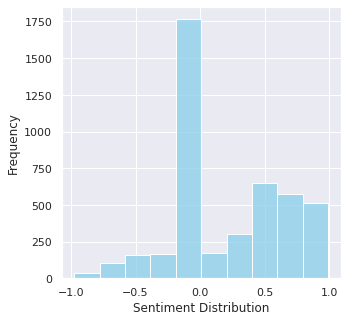

In [ ]:
# settings for seaborn plotting style
sns.set(color_codes=True)

# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

# create histogram
ax = sns.histplot(tweets2['C_Score'],
                  bins=10,
                  kde=False,
                  color='skyblue')
ax.set(xlabel='Sentiment Distribution', ylabel='Frequency')

### What do we see from this distribution? 
Most Tweets are neutral, and skewed toward the positive ranges. Negative Tweets are less common. This might give insight as to what our marketing strategy should target.

In [ ]:
# create new column with missing values
tweets2['Sentiment'] = np.nan

# loop through rows of dataframe and determine strings for new column "Sentiment"
for index, row in tweets2.iterrows(): 
    if tweets2.loc[index, 'C_Score'] > 0.05 : 
            tweets2.loc[index, 'Sentiment'] = "Positive"       
    elif tweets2.loc[index, 'C_Score'] < -0.05 :
            tweets2.loc[index, 'Sentiment'] = "Negative"   
    else : 
        tweets2.loc[index, 'Sentiment'] = "Neutral"

# typecast as categorical variable (computationally more efficient)
tweets2['Sentiment'] = tweets2['Sentiment'].astype("category")

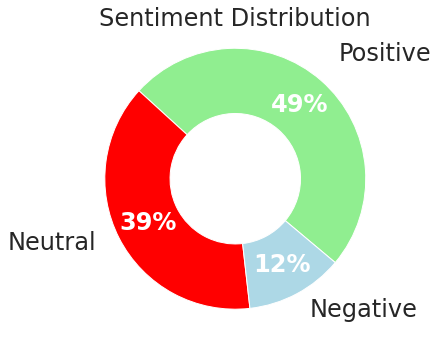

In [ ]:
# set font size
plt.rcParams['font.size']=24

# define figure
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))

# get count by sentiment category from tweets_df
sentiment_counts = tweets2.Sentiment.value_counts()
labels = sentiment_counts.index

# define colors
color_palette_list = ['lightgreen', 'red', 'lightblue','orange']

# generate graph components
wedges, texts, autotexts = ax.pie(sentiment_counts, wedgeprops=dict(width=0.5), startangle=-40,  
       colors=color_palette_list[0:3], autopct='%1.0f%%', pctdistance=.75, textprops={'color':"w", 'weight':'bold'})

# plot wedges
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                horizontalalignment=horizontalalignment)
# set title
ax.set_title("Sentiment Distribution", y=.95, fontsize = 24)

# show Doughnut Chart
plt.show()

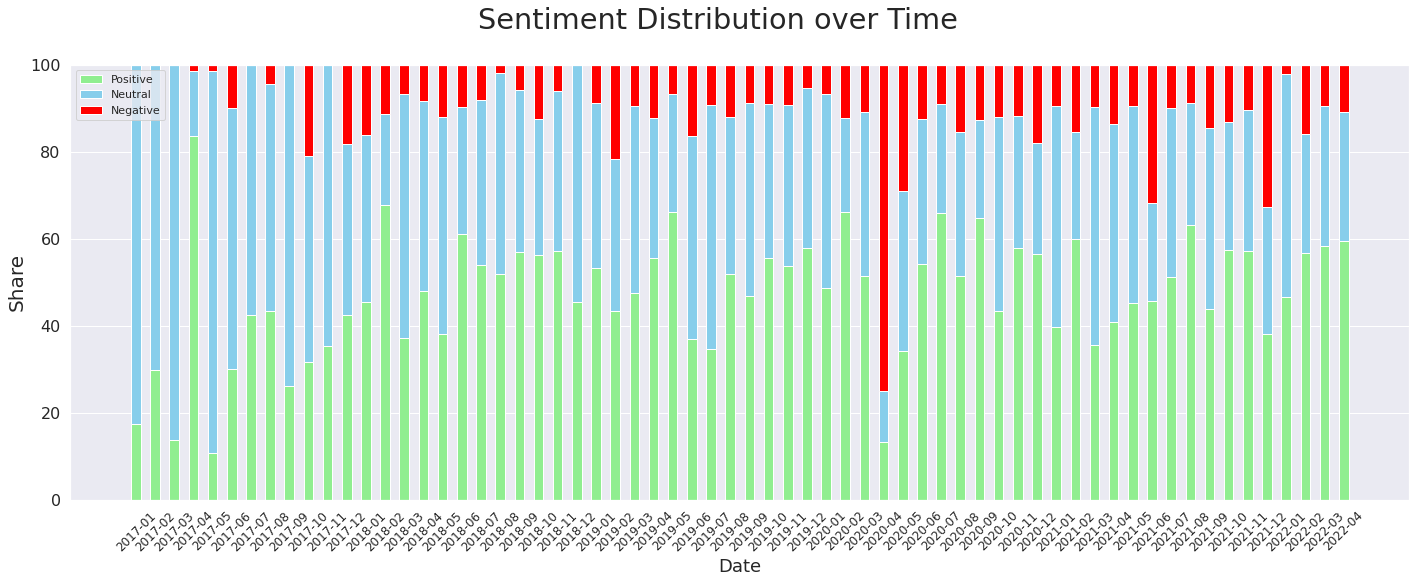

In [ ]:
# new column that holds days (sorted)
tweets = tweets2
tweets['year'] = tweets['date'].dt.year
tweets['month'] = tweets['date'].dt.month
tweets['year_month'] = tweets['year'].astype('str') + '-' + tweets['month'].apply(lambda x: '%02d' % x)
# tweets['day'] = [one.date().month for one in tweets['date']]
tweets = tweets.sort_values(by=['year_month'])

group = 'year_month'

# create props (stacked bars) for sentiment grouped by day (as % shares)
sentiments = ["Positive", "Neutral", "Negative"]
positiveProps = (tweets[tweets.Sentiment == 'Positive'].groupby([group]).count()[['Sentiment']]/ tweets.groupby([group]).count()[['Sentiment']])*100
neutralProps = (tweets[tweets.Sentiment == 'Neutral'].groupby([group]).count()[['Sentiment']]/ tweets.groupby([group]).count()[['Sentiment']])*100
negativeProps = (tweets[tweets.Sentiment == 'Negative'].groupby([group]).count()[['Sentiment']]/ tweets.groupby([group]).count()[['Sentiment']])*100

# turn props into lists 
positiveProps = positiveProps['Sentiment'].tolist()
neutralProps = neutralProps['Sentiment'].tolist()
negativeProps = negativeProps['Sentiment'].tolist()

# set-up plot
plt.figure(figsize=[24, 8])
barWidth = 0.5
labels = tweets.year_month.unique()
r = np.arange(len(labels))

# set values to zero if missing
positiveProps = [0 if math.isnan(x) else x for x in positiveProps]
neutralProps = [0 if math.isnan(x) else x for x in neutralProps]
negativeProps = [0 if math.isnan(x) else x for x in negativeProps]

# define appearance of bar plot
plt.bar(r, positiveProps, color='lightgreen', edgecolor='white', width=barWidth)
plt.bar(r, neutralProps, bottom=positiveProps, color='skyblue', edgecolor='white', width=barWidth)
plt.bar(r, negativeProps, bottom=[i+j for i,j in zip(positiveProps, neutralProps)], color='red', edgecolor='white', width=barWidth)

# additional plot settings and style 
plt.xticks(r, labels, rotation = 45, fontsize=12)
plt.yticks(fontsize=16)
plt.suptitle('Sentiment Distribution over Time')
plt.xlabel("Date", fontsize=18)
plt.ylabel("Share", fontsize=20)
plt.legend(sentiments)
plt.show()

# sort by Index again to restore orignal order of tweets (since we had grouped and sorted them differently for this part)
tweets.sort_index(inplace=True)

### What can we tell about the distribution?
It is largely positive and neutral, and there appear to be a lot of negative Tweets in April of 2020, could this be related to Covid-19? What can we tell from the prevalence of negative Tweets? Are they actually negative, or is it a lapse on the part of Vader?

In [ ]:
# what is the distribution of the scores?
tweets['C_Score'].describe()

count    4439.000000
mean        0.237423
std         0.407586
min        -0.973300
25%         0.000000
50%         0.000000
75%         0.585900
max         0.989500
Name: C_Score, dtype: float64

In [ ]:
# what are some really negative tweets?
tweets[tweets['C_Score'] < -0.9]

,id,content,date,stripped,C_Score,Sentiment,year,month,year_month
212,1476689017303445506,. This really is tacky. Not one small flag somewhere (why any). . But 3 whacking huge ones. TWO bloody Union flags. And a whacking huge Graduate hotel flag. (they are American) 😱😱😱. It looks absolutely so cheap..Why do we have these flags anyway.?? #randolphhotel https://t.co/6K8coNXZyV,2021-12-30 22:57:51+00:00,. This really is tacky. Not one small flag somewhere (why any). . But 3 whacking huge ones. TWO bloody Union flags. And a whacking huge Graduate hotel flag. (they are American) 😱😱😱. It looks absolutely so cheap..Why do we have these flags anyway.?? randolphhotel,-0.9733,Negative,2021,12,2021-12
252,1467631130815967235,Police: Two stabbed following an argument during small birthday party at The Graduate Hotel https://t.co/lV9gZnzKSG #RIlawyer #Warwick #RhodeIsland #crime https://t.co/1K6p0o10yR #lawyer #arrest #police #violence #providence https://t.co/605bOLi0nE,2021-12-05 23:05:03+00:00,Police: Two stabbed following an argument during small birthday party at The Graduate Hotel RIlawyer Warwick RhodeIsland crime lawyer arrest police violence providence,-0.9136,Negative,2021,12,2021-12
324,1456610987210067972,"Police believe the parking lot where Young was killed is the same place a man stood when he fired a gun that strayed a bullet at Michelle Cummings, the mother of a Naval Academy midshipman, who was sitting on the patio of the Graduate Hotel when she was killed",2021-11-05 13:14:56+00:00,"Police believe the parking lot where Young was killed is the same place a man stood when he fired a gun that strayed a bullet at Michelle Cummings, the mother of a Naval Academy midshipman, who was sitting on the patio of the Graduate Hotel when she was killed",-0.9432,Negative,2021,11,2021-11
454,1439675657408028672,"The Graduate Hotel in Eugene is hosting professional troll and racist, Charlie Kirk, in October, and have turned off commenting on their pages. Would be just horrible to give them a bad review instead. https://t.co/U093H3d4If",2021-09-19 19:39:59+00:00,"The Graduate Hotel in Eugene is hosting professional troll and racist, Charlie Kirk, in October, and have turned off commenting on their pages. Would be just horrible to give them a bad review instead.",-0.9001,Negative,2021,9,2021-09
600,1413857806583730177,@BeschlossDC Walked past that statue many times from the Graduate Hotel to UVA Medical Center and even with it gone I'll never forget what happened nearly 4 years ago when a bunch of crazed Nazis chanting evil racist slogans took over the town &amp; Heather Heyer was murdered.,2021-07-10 13:49:03+00:00,BeschlossDC Walked past that statue many times from the Graduate Hotel to UVA Medical Center and even with it gone I'll never forget what happened nearly 4 years ago when a bunch of crazed Nazis chanting evil racist slogans took over the town Heather Heyer was murdered.,-0.9278,Negative,2021,7,2021-07
639,1410383900795277314,"The murder of a midshipman candidate's mother comes as gun violence soars across the country.\n\nMichelle Cummings, was killed by two stray bullets while sitting outside the Graduate Hotel in Annapolis early Tuesday morning.\n\nhttps://t.co/Vdrj9TIrGW",2021-06-30 23:45:00+00:00,"The murder of a midshipman candidate's mother comes as gun violence soars across the country.Michelle Cummings, was killed by two stray bullets while sitting outside the Graduate Hotel in Annapolis early Tuesday morning.",-0.9493,Negative,2021,6,2021-06
1478,1292170140189110272,@jendinger @Graduate_Hotels This is one of the following A) fake. B) a train wreck waiting to happen when Covid19 rolls through the whole place in one night C) resulting in hundreds of rapes and its own AA Meeting D) low estimates are the 50% of uark students to have STI’s.....so,2020-08-08 18:45:43+00:00,jendinger Graduate_Hotels This is one of the following A) fake. B) a train wreck waiting to happen when Covid19 rolls through the whole place in one night 

### Entity recognition and semantics with Spacy
What sort of entites are recognized automatically in the Tweets? Do these point in a direction of how to approach brand opinions and entity extraction?

In [ ]:
# let's do some entity recognition
import spacy

# load/Instantiate Language model (must previously install it!)
nlp = spacy.load('en_core_web_sm')

In [ ]:
# print deeply negative text
text = tweets[tweets['C_Score'] < -0.9].loc[:, 'content'].iloc[1]
print(text)

Police: Two stabbed following an argument during small birthday party at The Graduate Hotel https://t.co/lV9gZnzKSG #RIlawyer #Warwick #RhodeIsland #crime https://t.co/1K6p0o10yR #lawyer #arrest #police #violence #providence https://t.co/605bOLi0nE


In [ ]:
doc = nlp(text)
print(doc)

Police: Two stabbed following an argument during small birthday party at The Graduate Hotel https://t.co/lV9gZnzKSG #RIlawyer #Warwick #RhodeIsland #crime https://t.co/1K6p0o10yR #lawyer #arrest #police #violence #providence https://t.co/605bOLi0nE


In [ ]:
# what are the keywords? does this hint at a keyword clustering analysis?
for token in doc:
    print((token.head.text, token.text, token.dep_)) 

('Police', 'Police', 'ROOT')
('Police', ':', 'punct')
('Police', 'Two', 'appos')
('Two', 'stabbed', 'acl')
('stabbed', 'following', 'prep')
('argument', 'an', 'det')
('following', 'argument', 'pobj')
('argument', 'during', 'prep')
('party', 'small', 'amod')
('party', 'birthday', 'compound')
('during', 'party', 'pobj')
('party', 'at', 'prep')
('Hotel', 'The', 'det')
('Hotel', 'Graduate', 'compound')
('https://t.co/lV9gZnzKSG', 'Hotel', 'compound')
('at', 'https://t.co/lV9gZnzKSG', 'pobj')
('RIlawyer', '#', 'dep')
('RIlawyer', 'RIlawyer', 'ROOT')
('Warwick', '#', 'nmod')
('RIlawyer', 'Warwick', 'appos')
('crime', '#', 'nmod')
('crime', 'RhodeIsland', 'nmod')
('crime', '#', 'dep')
('#', 'crime', 'compound')
('#', 'https://t.co/1K6p0o10yR', 'compound')
('lawyer', '#', 'compound')
('RIlawyer', 'lawyer', 'appos')
('arrest', '#', 'compound')
('RIlawyer', 'arrest', 'nummod')
('police', '#', 'nmod')
('violence', 'police', 'compound')
('violence', '#', 'nmod')
('#', 'violence', 'compound')
('pro

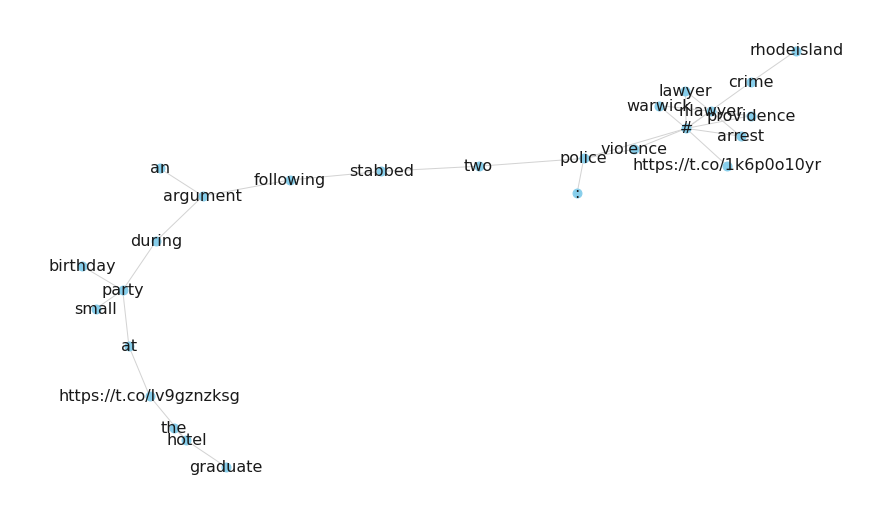

In [ ]:
# make a graph of a sentence and dependencies
import spacy
import networkx as nx
# Let's Generate a Network (Graph) Representation of the Dependencies

# load spacy's dependency tree into a networkx graph (edges and nodes)
edges = []
for token in doc:
    for child in token.children:
        edges.append(('{0}'.format(token.lower_),
                      '{0}'.format(child.lower_)))

# construct graph and visualize it
G = nx.Graph(edges)

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 7)
nx.draw(G, with_labels=True, node_size=80, font_size=16, node_color='skyblue', edge_color='lightgrey')
plt.show()

## Begin Tweet preprocessing for lemmatized keyword search 
The purpose of this is to identify what sort of Tweet activity contributes to the sentiments in Tweets



In [ ]:
!pip3 install tweet-preprocessor

# load the preprocessor package
import preprocessor as prepro

In [ ]:
prepro.set_options(prepro.OPT.URL, prepro.OPT.RESERVED, prepro.OPT.MENTION, prepro.OPT.HASHTAG)

# let's do it for all tweets
tweets['text']  = tweets['content'].apply(prepro.clean)

# check our work
tweets['text'].tail(10)

4429    AJ Capital Partners Acquires The Commons Hotel in Minneapolis, Minnesota to Be Converted to Graduate Hotel …
4430                                                              Hotel lobby at for Mavin's second in morning at U…
4431                                         AJ Capital Partners Acquires The in , to Be Converted to Graduate Hotel
4432      AJ Capital Partners Acquires The Commons Hotel in Minneapolis, Minnesota to Be Converted to Graduate Hotel
4433                         Chicago firm to convert another university-area hotel into upscale Graduate Hotel brand
4434                     BJ: Chicago firm to convert another university-area hotel into upscale Graduate Hotel brand
4435                         Chicago firm to convert another university-area hotel into upscale Graduate Hotel brand
4436                         Chicago firm to convert another university-area hotel into upscale Graduate Hotel brand
4437                         Chicago firm to convert another uni

In [ ]:
# clean the tweets
htmlents = r'|'.join((r'&copy;',r'&reg;',r'&quot;',r'&gt;',r'&lt;',r'&nbsp;',r'&apos;',r'&cent;',r'&euro;',r'&pound;')) 
tweets.text = tweets.text.replace(
    {htmlents:'',       # remove html punctuation codes
     '#|@|—|-':'',          # remove hashtag # and reference @ and –/-, leaving tags (unless preprocessor removed already)
     '&amp;':' and ',   # &amp; to and
     '\n|\t':' '}, regex=True) # strip HTMLentries, hash tag markers, reference @, newlines
tweets.text = tweets.text.str.strip().replace({' +':' '},regex=True) # collapse extra spaces
# check our Work
tweets.text.tail(10)

4429    AJ Capital Partners Acquires The Commons Hotel in Minneapolis, Minnesota to Be Converted to Graduate Hotel …
4430                                                              Hotel lobby at for Mavin's second in morning at U…
4431                                         AJ Capital Partners Acquires The in , to Be Converted to Graduate Hotel
4432      AJ Capital Partners Acquires The Commons Hotel in Minneapolis, Minnesota to Be Converted to Graduate Hotel
4433                          Chicago firm to convert another universityarea hotel into upscale Graduate Hotel brand
4434                      BJ: Chicago firm to convert another universityarea hotel into upscale Graduate Hotel brand
4435                          Chicago firm to convert another universityarea hotel into upscale Graduate Hotel brand
4436                          Chicago firm to convert another universityarea hotel into upscale Graduate Hotel brand
4437                          Chicago firm to convert another un

In [ ]:
# make a backup of the tweets dataframe
tweets_store = tweets.copy(deep=True)

In [ ]:
# import libraries to tokenize and eventually identify keywords
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tweets['tokenized'] = tweets['text'].apply(word_tokenize)

In [ ]:
tweets['tokenized'].head()

0                                                                       [staying, in, Fayetteville, with, our, daughter, for, the, weekend, at, the, Graduate, Hotel, ., This, is, the, room, key, 🤓]
1                                                                                                                                       [At, the, Graduate, Hotel, ,, 615, Washington, at, the, U, .]
2                                                                                                                                                           [Graduate, Hotels, ,, it, 's, a, natural]
3                                                                                  [Woke, up, mad, cause, I, just, remembered, that, The, Graduate, Hotel, in, Oxford, doesn, ’, t, have, a, pool, .]
4    [SHH, Hospitality, at, the, Graduate, Hotel, in, Oxford, bespoke, wine, cabinets, sit, alongside, handillustrated, cartoons, depicting, scences, from, the, story, of, Alice, in, Wonderland, .]
Name: toke

In [ ]:
# lowercase the keywords for uniformity
tweets['tokenized'] = tweets['tokenized'].apply(lambda x: [t.lower() for t in x])

In [ ]:
tweets['tokenized'].head()

0                                                                       [staying, in, fayetteville, with, our, daughter, for, the, weekend, at, the, graduate, hotel, ., this, is, the, room, key, 🤓]
1                                                                                                                                       [at, the, graduate, hotel, ,, 615, washington, at, the, u, .]
2                                                                                                                                                           [graduate, hotels, ,, it, 's, a, natural]
3                                                                                  [woke, up, mad, cause, i, just, remembered, that, the, graduate, hotel, in, oxford, doesn, ’, t, have, a, pool, .]
4    [shh, hospitality, at, the, graduate, hotel, in, oxford, bespoke, wine, cabinets, sit, alongside, handillustrated, cartoons, depicting, scences, from, the, story, of, alice, in, wonderland, .]
Name: toke

In [ ]:
# eliminate stop words that are meaningless and clutter the tweets
nltk.download('stopwords')
nltk.download('wordnet')
tweets['tokenized'] = tweets['tokenized'].apply(lambda tokens: [t for t in tokens if t not in stopwords.words('english')])
tweets['tokenized'] = tweets['tokenized'].apply(lambda tokens: [w for w in tokens if w.isalpha()])

# lemmatize the Tweets
from nltk.stem import WordNetLemmatizer
le = WordNetLemmatizer()
tweets['lemmatized'] = tweets['tokenized'].apply(lambda tokens: [le.lemmatize(w) for w in tokens])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# create a list of the lemmatized Tweets to find the most common words
lemm_list = tweets['lemmatized'].to_list()

In [ ]:
# do a breakup of the lemm_list to get a collective of the words
flat_list = [item for sublist in lemm_list for item in sublist]

In [ ]:
# what are the most common keywords? graduate and hotel are common because of our verbatim scrape search
display(Counter(flat_list).most_common(100))

[('hotel', 4419),
 ('graduate', 4240),
 ('new', 370),
 ('room', 261),
 ('u', 253),
 ('stay', 236),
 ('university', 223),
 ('town', 196),
 ('island', 192),
 ('campus', 177),
 ('get', 175),
 ('roosevelt', 173),
 ('berkeley', 170),
 ('city', 168),
 ('open', 167),
 ('see', 166),
 ('today', 162),
 ('bar', 162),
 ('one', 158),
 ('via', 155),
 ('college', 154),
 ('great', 147),
 ('inspired', 144),
 ('indiana', 144),
 ('nashville', 142),
 ('student', 141),
 ('going', 139),
 ('lincoln', 138),
 ('boutique', 134),
 ('night', 133),
 ('day', 132),
 ('local', 129),
 ('downtown', 128),
 ('hyper', 128),
 ('providence', 126),
 ('jones', 126),
 ('oxford', 125),
 ('check', 124),
 ('remake', 123),
 ('landmark', 122),
 ('iowa', 119),
 ('partner', 117),
 ('capital', 117),
 ('come', 116),
 ('love', 115),
 ('place', 114),
 ('rooftop', 114),
 ('join', 111),
 ('time', 107),
 ('look', 102),
 ('find', 102),
 ('event', 100),
 ('like', 99),
 ('last', 99),
 ('aj', 98),
 ('first', 96),
 ('year', 95),
 ('go', 92),
 ('

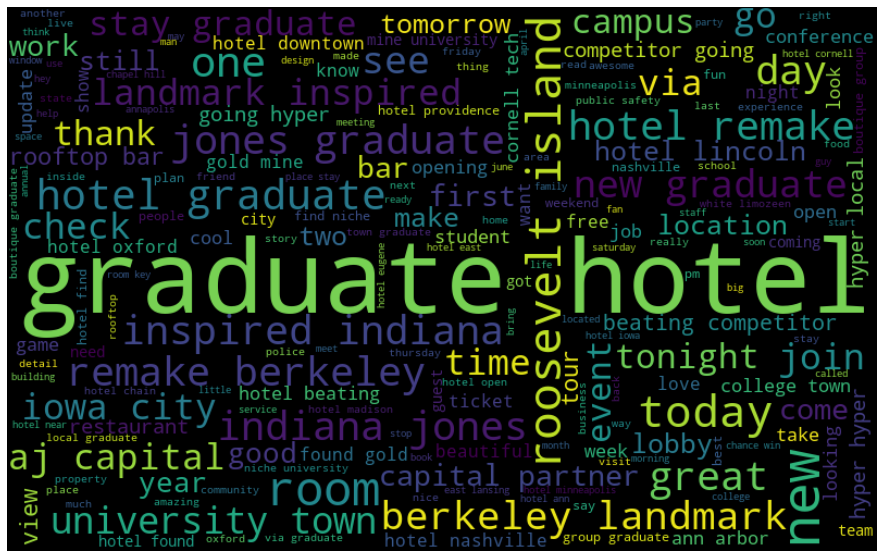

In [ ]:
from wordcloud import WordCloud

all_words = ' '.join([text for text in flat_list])


wordcloud = WordCloud(width=800, height=500, random_state=5, max_font_size=110).generate(all_words)

# visualize
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# what words are the most common?
most_common = pd.DataFrame.from_dict(Counter(flat_list), orient='index').reset_index().sort_values([0], ascending=False)
most_common

,index,0
5,hotel,4419
4,graduate,4240
32,new,370
6,room,261
9,u,253
...,...,...
4021,outfitting,1
4022,ascott,1
4024,liana,1
4025,friendswho,1


In [ ]:
most = most_common[most_common['index'] != 'hotel']
most = most[most['index'] != 'graduate']
most

,index,0
32,new,370
6,room,261
9,u,253
309,stay,236
66,university,223
...,...,...
4021,outfitting,1
4022,ascott,1
4024,liana,1
4025,friendswho,1


### Words such as new and room and university are common
We need to identify the sentiment regarding these words to see how they fluctuate and what causes them to do so.

([<matplotlib.patches.Wedge at 0x7f74cb5a2bd0>,
 [Text(1.0943739120480445, 0.11111138838417675, 'new'),
  Text(1.0590430019453938, 0.2973683238519007, 'room'),
  Text(1.0069368287797489, 0.4428072073114699, 'u'),
  Text(0.9389086571125222, 0.5731060404490257, 'stay'),
  Text(0.8597734295984387, 0.6861411296202399, 'university'),
  Text(0.7756874674289558, 0.7799416342737788, 'town'),
  Text(0.6887243200167878, 0.8577055503011587, 'island'),
  Text(0.5988169740534102, 0.9227232692338032, 'campus'),
  Text(0.507360078161803, 0.9760049954214627, 'get'),
  Text(0.41232134274093074, 1.0197995441851875, 'roosevelt'),
  Text(0.3149925378835677, 1.0539353400838543, 'berkeley'),
  Text(0.21636925181459732, 1.0785102442115195, 'city'),
  Text(0.11679607424566366, 1.093781823327121, 'open'),
  Text(0.01684491112340557, 1.0998710146963802, 'see'),
  Text(-0.08174601169368428, 1.0969583353857046, 'today'),
  Text(-0.17849247541944394, 1.0854217780285411, 'bar'),
  Text(-0.27267305185764945, 1.06566

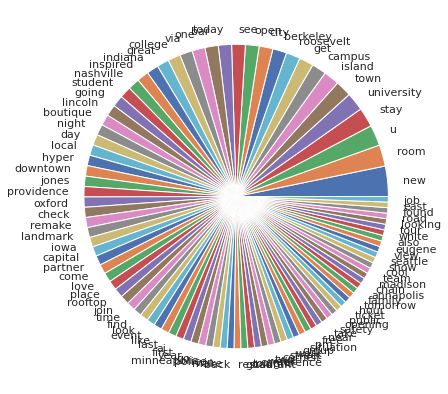

In [ ]:
# make a pie chart of how those most common words are distributed
plt.pie(most[0].head(100), labels=most['index'].head(100))

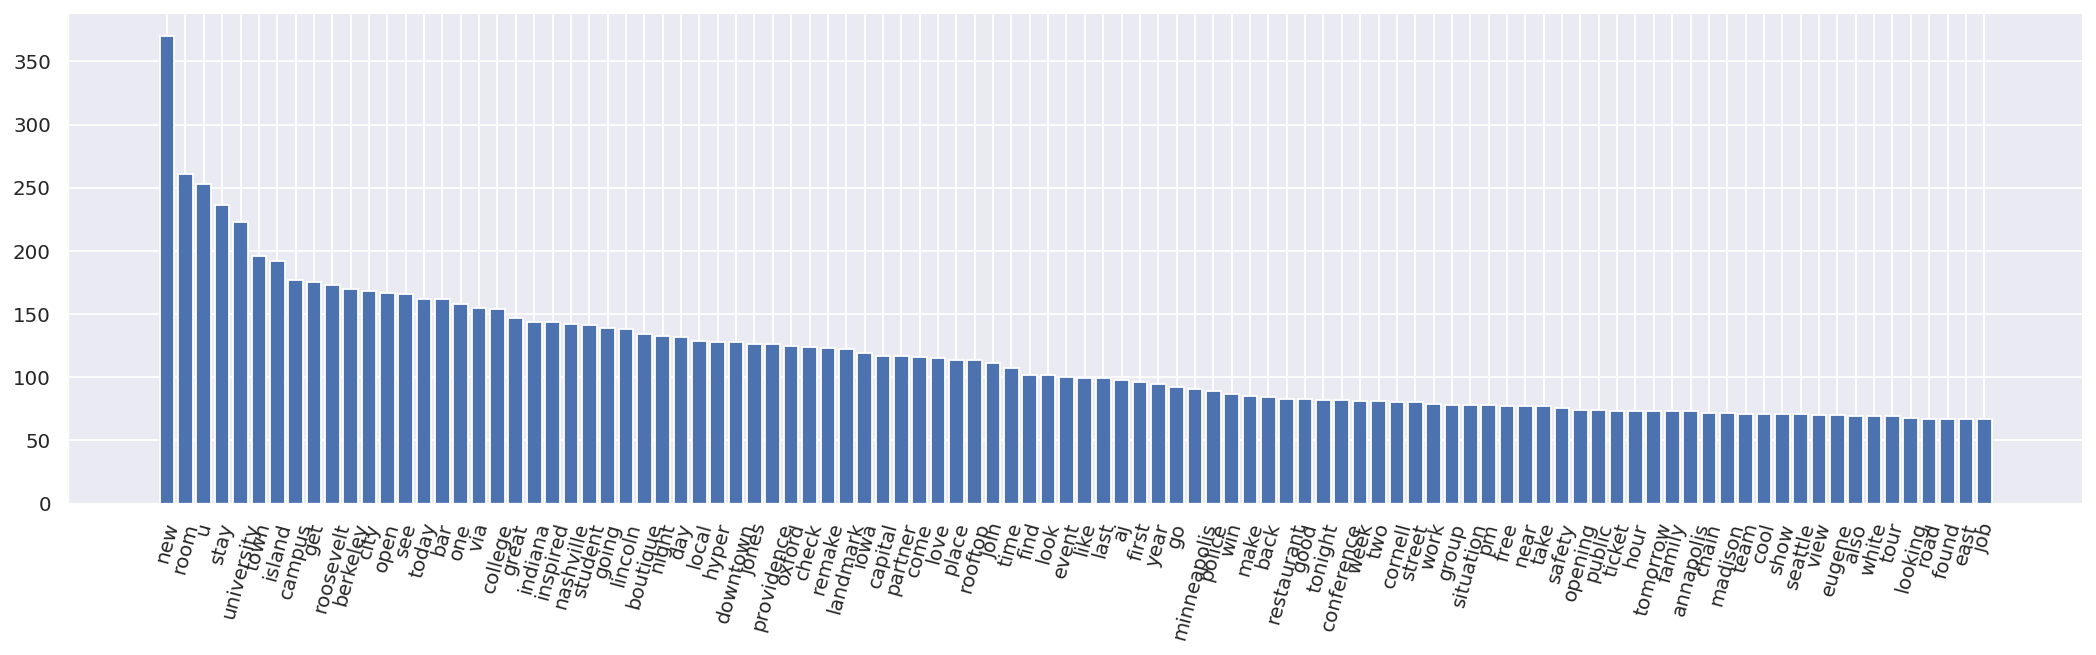

In [ ]:
# bar plot to compare usage
from matplotlib.pyplot import figure, rcParams

figure(figsize=(20, 5), dpi=130)
plt.bar(most['index'].head(100), most[0].head(100))
plt.xticks(rotation=75)
plt.rcParams.update({'font.size': 12})



In [ ]:
# use the 'set' constructor in Python to make O(1) access and verification if a word is in a set
tweets['lemm_set'] = tweets['lemmatized'].apply(lambda x: set(x))

In [ ]:
# what is the distribution of Tweets that contain 'new'?
contains_new = tweets[tweets['lemm_set'].apply(lambda x: 'new' in x)]

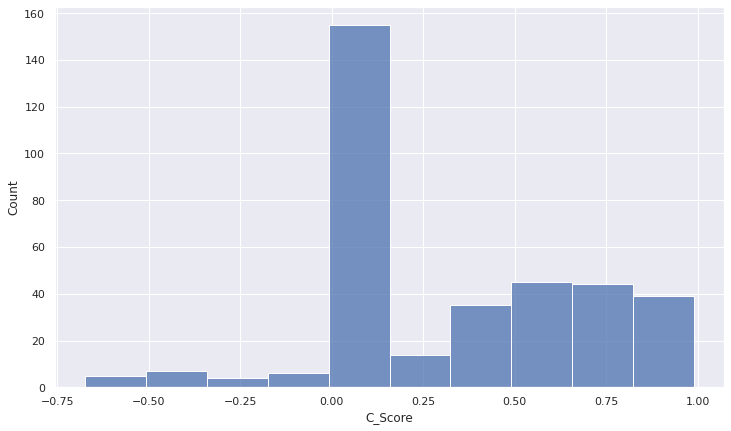

In [ ]:
sns.histplot(data=contains_new, x=contains_new['C_Score'])

In [ ]:
# make a deep copy of the tweets dataframe
temp = tweets.copy(deep=True)
# tweets = temp.copy(deep=True)

### Make a heatmap to identify strongly correlated words

In [ ]:
# use sklearn's multilabelbinarizer
from sklearn.preprocessing import MultiLabelBinarizer
tweets = temp.copy(deep=True)
test = tweets['lemm_set'].to_list()


mlb = MultiLabelBinarizer()

res = pd.DataFrame(mlb.fit_transform(test),
                   columns=mlb.classes_)

In [ ]:
res

,aa,aadmi,aam,aamg,aaron,abandoned,abbot,able,abney,abound,...,𝘾𝙤𝙖𝙘𝙝,𝘿𝙤𝙧𝙚𝙨,𝙁𝙤𝙤𝙙,𝙉𝙞𝙣𝙚𝙢𝙞𝙧𝙚,𝙏𝙤𝙪𝙧𝙨,𝙒𝙚𝙚𝙠𝙚𝙣𝙙,𝙖,𝙡𝙚𝙜𝙚𝙣𝙙,𝙩𝙝𝙚,𝙬𝙞𝙩𝙝
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# get a list of the top 100 words
top_100_list = most.head(100)['index'].to_list()

In [ ]:
small_res = res[top_100_list]
small_res

,new,room,u,stay,university,town,island,campus,get,roosevelt,...,view,eugene,also,white,tour,looking,road,found,east,job
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# get the correlation matrix
corr = small_res.corr()

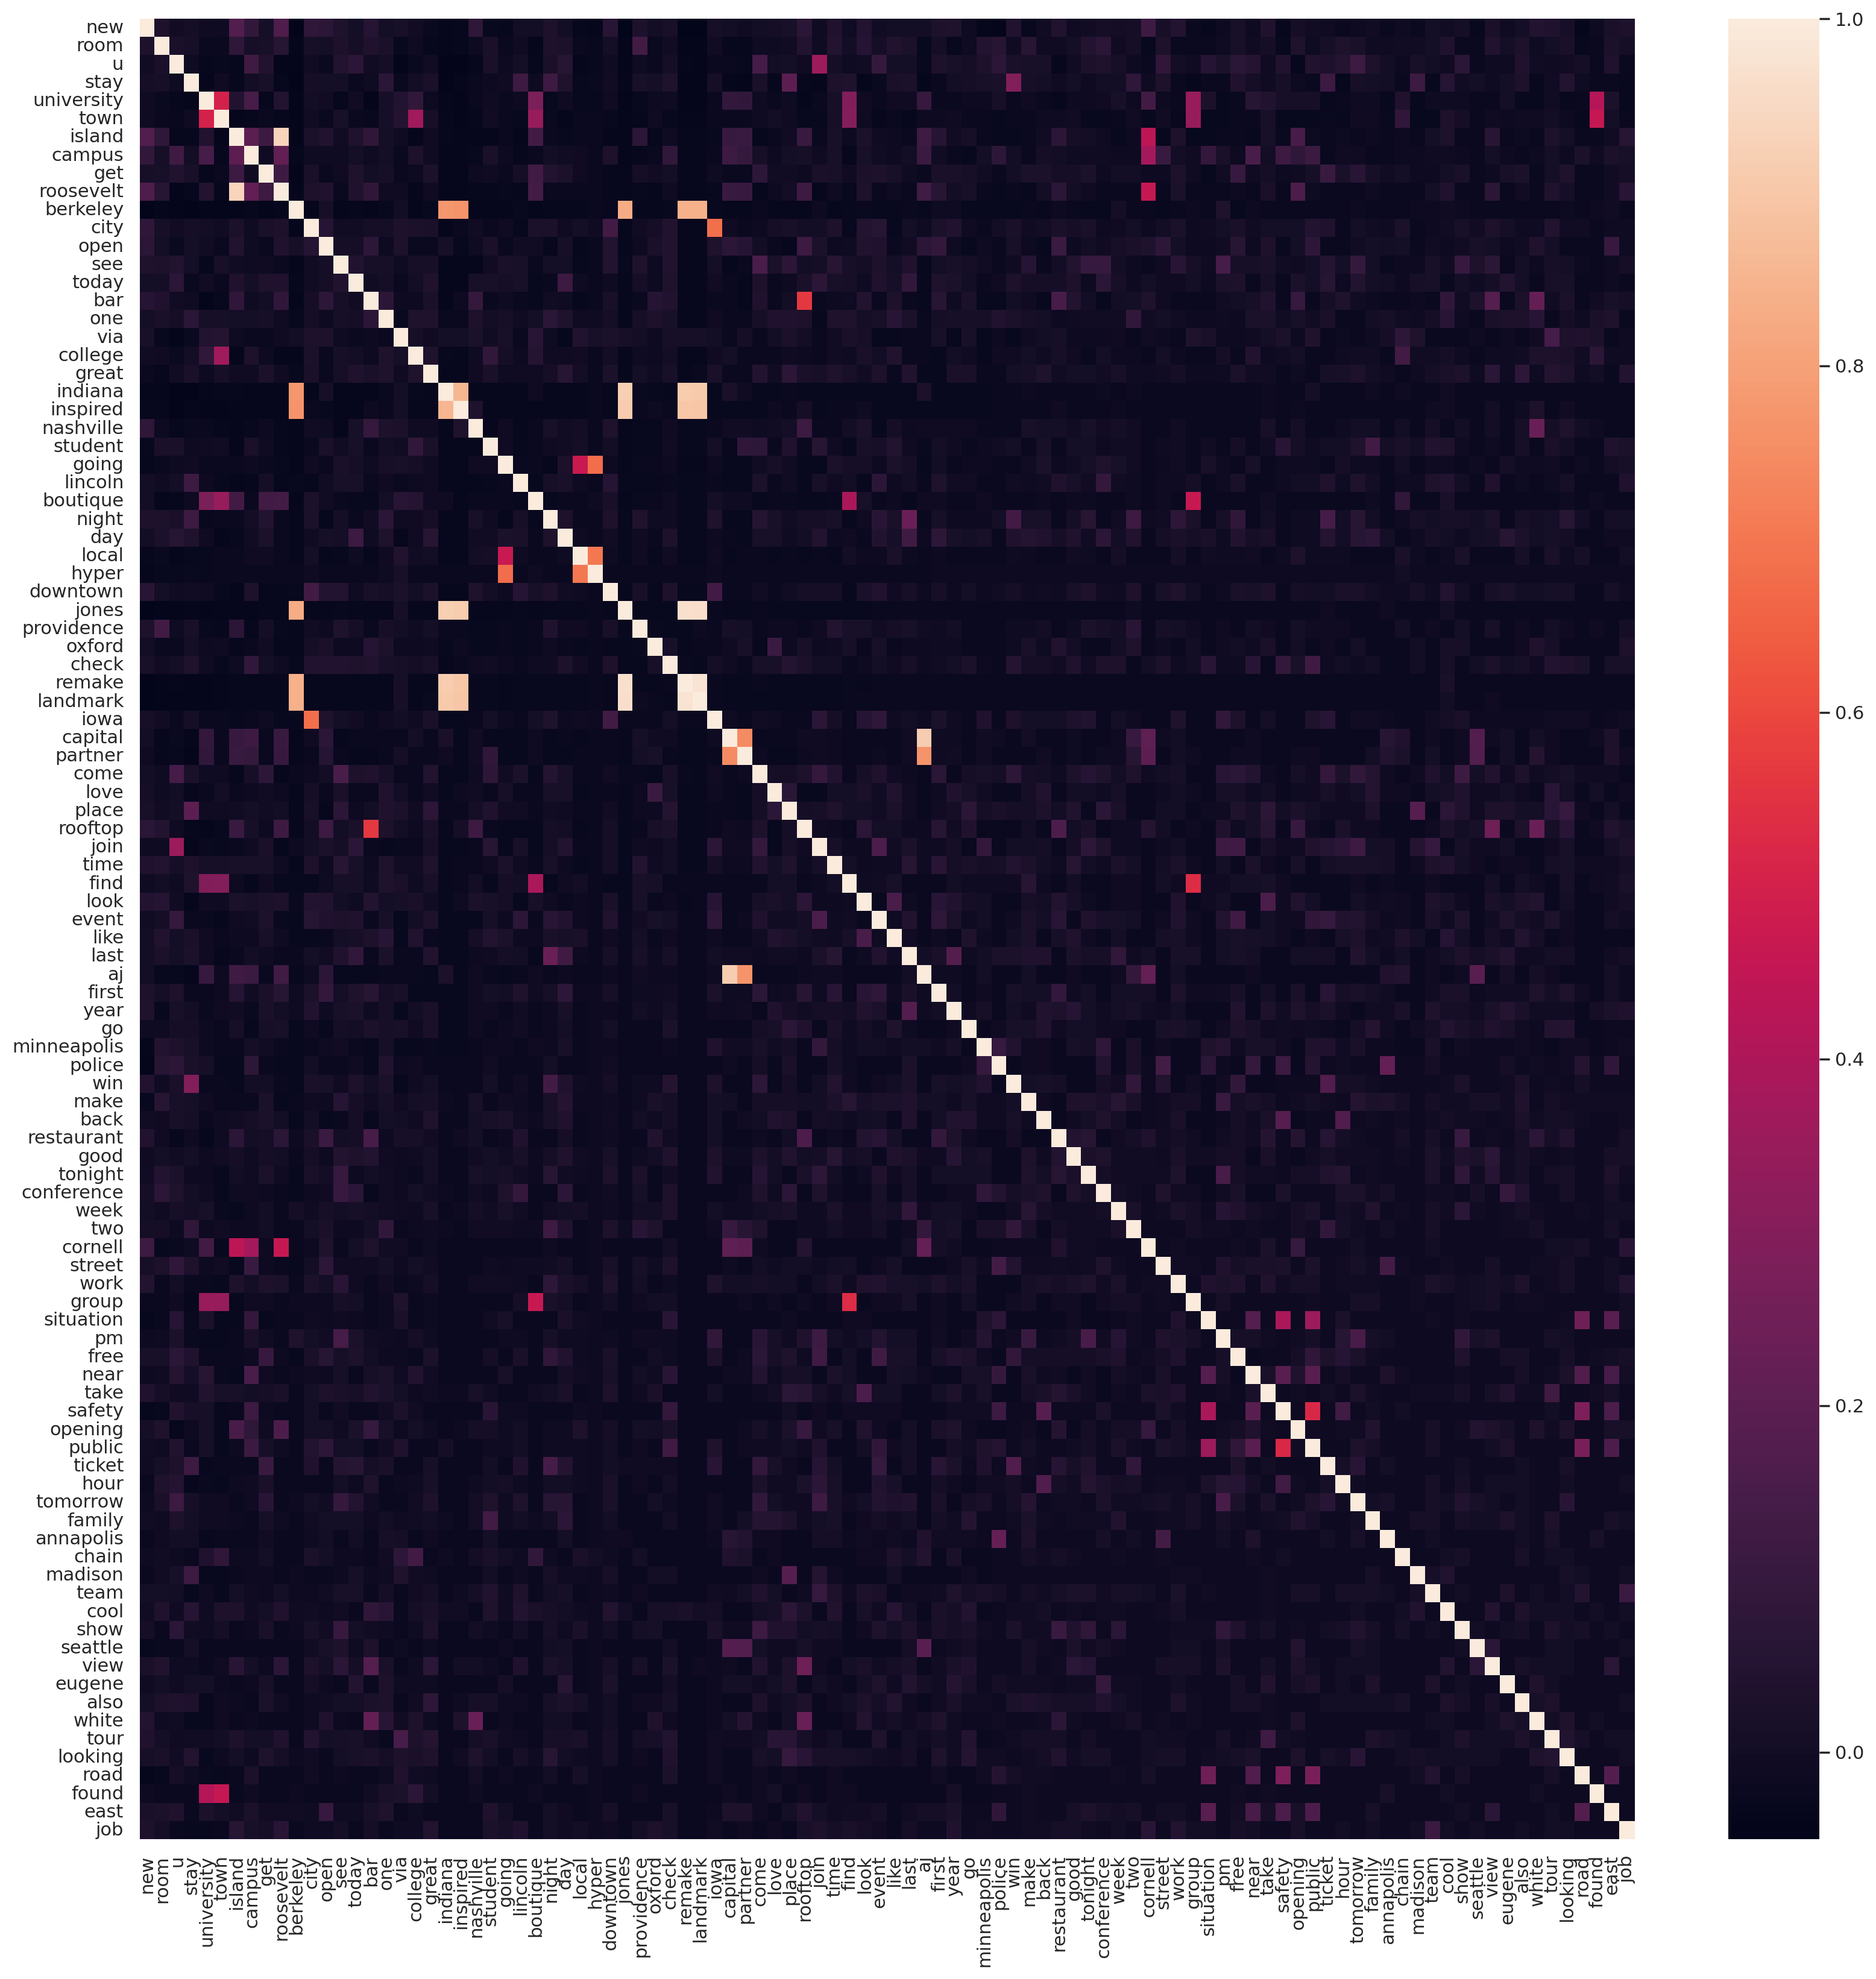

In [ ]:
plt.figure(figsize=(20, 20), dpi=200)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
c = corr
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

In [ ]:
pd.set_option('display.max_rows', 500)
so = so.drop_duplicates()
print(so[so != 1].head(300))

landmark     remake         0.979021
jones        remake         0.971151
             landmark       0.966948
roosevelt    island         0.934660
indiana      jones          0.921462
capital      aj             0.916932
inspired     jones          0.910490
remake       indiana        0.909740
indiana      landmark       0.905802
remake       inspired       0.898719
inspired     landmark       0.894765
             indiana        0.852376
berkeley     landmark       0.843682
             remake         0.840074
jones        berkeley       0.829504
berkeley     indiana        0.775929
partner      aj             0.767474
inspired     berkeley       0.766330
partner      capital        0.747209
hyper        local          0.701916
city         iowa           0.681945
going        hyper          0.677760
bar          rooftop        0.563369
find         group          0.533722
public       safety         0.522151
university   town           0.503456
going        local          0.467418
b

## What can we tell?
There are strongly correlated words like "landmark" and "remake", and "rooftop" and "view". This hints at different clusters we may be able to identify.

In [ ]:
corr_df = pd.DataFrame(so).reset_index()

In [ ]:
# eliminate the repeat labels
print(corr_df.describe())
corr_df = corr_df[corr_df['level_0'] != corr_df['level_1']]
print(corr_df.describe())

                 0
count  4914.000000
mean      0.006628
std       0.073075
min      -0.050315
25%      -0.019847
50%      -0.008382
75%       0.011619
max       1.000000
                 0
count  4913.000000
mean      0.006426
std       0.071694
min      -0.050315
25%      -0.019848
50%      -0.008382
75%       0.011578
max       0.979021


In [ ]:
corr_df

,level_0,level_1,0
1,landmark,remake,0.979021
2,jones,remake,0.971151
3,jones,landmark,0.966948
4,roosevelt,island,0.934660
5,indiana,jones,0.921462
...,...,...,...
4909,berkeley,new,-0.044432
4910,stay,berkeley,-0.045995
4911,landmark,new,-0.049487
4912,new,remake,-0.049696


### So what are some good word sets?
- college: college, university, school, student, campus, tour
- safety: situation, safety, public
- police: police
- food: restaurant, bar, meal
- view: view, rooftop
- gameday: ticket, game
- business: event, conference, show, work
- location: downtown, city, town, location
- room: room

In [ ]:
# what are the tweets that contain 'family'?
tweets.loc[(tweets['lemm_set'].apply(lambda x: 'family' in x))]

,id,content,date,stripped,C_Score,Sentiment,year,month,year_month,text,tokenized,lemmatized,lemm_set
7,1513702006485098501,Awesome Day meeting new friends at the Reviv Room @ The Graduate Hotel! Thanks to @revivfamilysupport for connecting us with sweet Andrew and his darling family! We hope you guys enjoy the new Lego sets snd telescope! 💙💛💙 @mandilammers22 @EmilySandhas @JohnDitullio @KeyesNick https://t.co/Htj6M4w0hr,2022-04-12 02:14:16+00:00,Awesome Day meeting new friends at the Reviv Room The Graduate Hotel! Thanks to revivfamilysupport for connecting us with sweet Andrew and his darling family! We hope you guys enjoy the new Lego sets snd telescope! 💙💛💙 mandilammers22 EmilySandhas JohnDitullio KeyesNick,0.9895,Positive,2022,4,2022-04,Awesome Day meeting new friends at the Reviv Room The Graduate Hotel! Thanks to for connecting us with sweet Andrew and his darling family! We hope you guys enjoy the new Lego sets snd telescope! 💙💛💙,"[awesome, day, meeting, new, friends, reviv, room, graduate, hotel, thanks, connecting, us, sweet, andrew, darling, family, hope, guys, enjoy, new, lego, sets, snd, telescope]","[awesome, day, meeting, new, friend, reviv, room, graduate, hotel, thanks, connecting, u, sweet, andrew, darling, family, hope, guy, enjoy, new, lego, set, snd, telescope]","{hope, family, graduate, awesome, thanks, friend, guy, connecting, new, reviv, sweet, snd, lego, darling, andrew, enjoy, telescope, hotel, set, meeting, room, u, day}"
144,1492911002219917313,"weekend review: although it is below freezing in this city, i thoroughly enjoyed my stay and the graduate hotel. we had an exquisite meal at The Airliner, and the proceeded to spend time with family. in the morning, i took a shower. we are going to devour a meal Hamburg Inn. 8/10",2022-02-13 17:18:14+00:00,"weekend review: although it is below freezing in this city, i thoroughly enjoyed my stay and the graduate hotel. we had an exquisite meal at The Airliner, and the proceeded to spend time with family. in the morning, i took a shower. we are going to devour a meal Hamburg Inn. 8/10",0.4927,Positive,2022,2,2022-02,"weekend review: although it is below freezing in this city, i thoroughly enjoyed my stay and the graduate hotel. we had an exquisite meal at The Airliner, and the proceeded to spend time with family. in the morning, i took a shower. we are going to devour a meal Hamburg Inn. 8/10","[weekend, review, although, freezing, city, thoroughly, enjoyed, stay, graduate, hotel, exquisite, meal, airliner, proceeded, spend, time, family, morning, took, shower, going, devour, meal, hamburg, inn]","[weekend, review, although, freezing, city, thoroughly, enjoyed, stay, graduate, hotel, exquisite, meal, airliner, proceeded, spend, time, family, morning, took, shower, going, devour, meal, hamburg, inn]","{thoroughly, spend, family, graduate, inn, review, shower, freezing, stay, time, although, airliner, devour, city, exquisite, morning, going, took, meal, proceeded, hotel, hamburg, enjoyed, weekend}"
211,1476704028457275407,This package includes:\nVisits to 3 murals\nOne-night stays at:\n-Riverhouse on the Deschutes in Bend\n-Ashland Springs Hotel\n-Graduate Hotel Eugene\nFamily pass to the High Desert Museum in Bend\nVouchers for the Oregon Shakespeare Festival in Ashland\nVouchers for the Eugene Ballet https://t.co/0cqXCKvBVK,2021-12-30 23:57:30+00:00,This package includes:Visits to 3 muralsOne-night stays at:-Riverhouse on the Deschutes in Bend-Ashland Springs Hotel-Graduate Hotel EugeneFamily pass to the High Desert Museum in BendVouchers for the Oregon Shakespeare Festival in AshlandVouchers for the Eugene Ballet,0.4939,Positive,2021,12,2021-12,This package includes: Visits to 3 murals Onenight stays at: Riverhouse on the Deschutes in Bend Ashland Springs Hotel Graduate Hotel Eugene Family pass to the High Desert Museum in Bend Vouchers for the Oregon Shakespeare Festival in Ashland Vouchers for the Eugene Ballet,"[package, includes, visits, murals, onenight, 

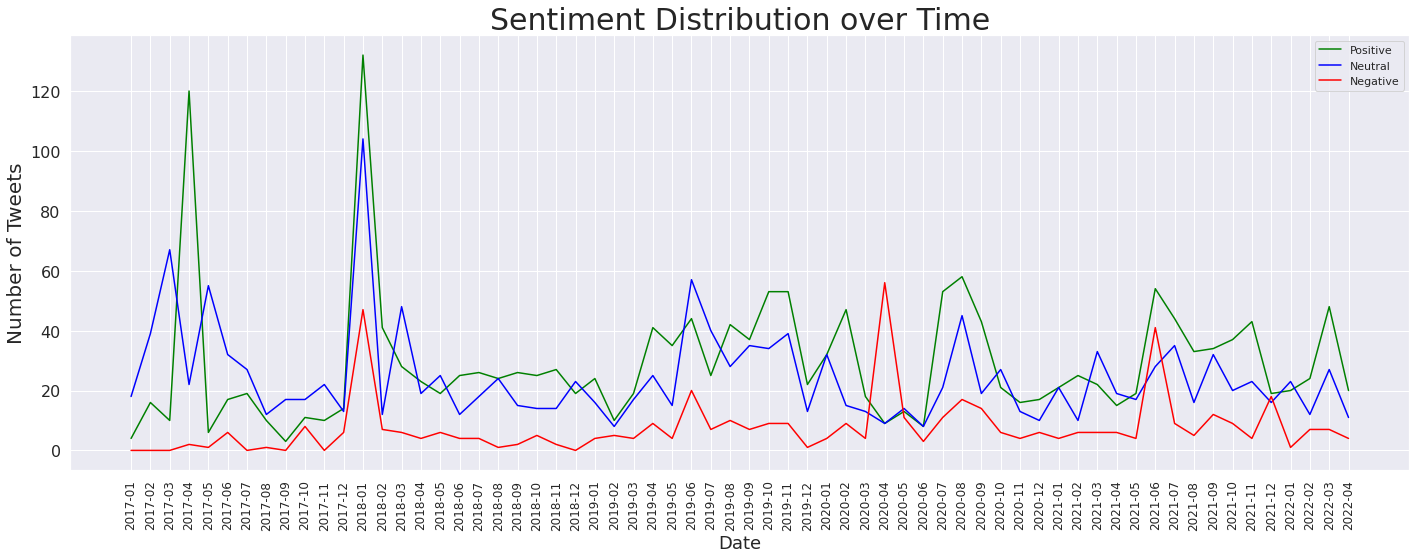

In [ ]:
# create a function that gets sentiment over time depending on the Tweets passed
def sentiment_over_time(tweets, tweets_full, timeframe):
  tweets = tweets.sort_values(by=[timeframe], ascending=True)

  group = timeframe

  # create props (stacked bars) for sentiment grouped by day (as % shares)
  sentiments = ["Positive", "Neutral", "Negative"]
  positiveProps = tweets[tweets.Sentiment == 'Positive'].groupby([group]).count()*tweets_full.groupby([group]).count()/tweets_full.groupby([group]).count()
  neutralProps = tweets[tweets.Sentiment == 'Neutral'].groupby([group]).count()*tweets_full.groupby([group]).count()/tweets_full.groupby([group]).count()
  negativeProps = tweets[tweets.Sentiment == 'Negative'].groupby([group]).count()*tweets_full.groupby([group]).count()/tweets_full.groupby([group]).count()

  # print(positiveProps['Sentiment'].fillna(0))

  # turn props into lists 
  positiveProps = positiveProps['Sentiment'].fillna(0).tolist()
  neutralProps = neutralProps['Sentiment'].fillna(0).tolist()
  negativeProps = negativeProps['Sentiment'].fillna(0).tolist()

  # set-up plot
  plt.figure(figsize=[24, 8])
  barWidth = 0.5
  labels = tweets_full[timeframe].sort_values(ascending=True).unique()
  r = np.arange(len(labels))

  # set values to zero if missing
  positiveProps = [0 if math.isnan(x) else x for x in positiveProps]
  neutralProps = [0 if math.isnan(x) else x for x in neutralProps]
  negativeProps = [0 if math.isnan(x) else x for x in negativeProps]

  # define appearance of line plot
  plt.plot(r, positiveProps, color='green')
  plt.plot(r, neutralProps, color='blue')
  plt.plot(r, negativeProps, color='red')

  # additional plot settings and style 
  plt.xticks(r, labels, rotation = 90, fontsize=12)
  plt.yticks(fontsize=16)
  plt.title('Sentiment Distribution over Time', fontsize=30)
  plt.xlabel("Date", fontsize=18)
  plt.ylabel("Number of Tweets", fontsize=20)
  plt.legend(sentiments)
  plt.show()

sentiment_over_time(tweets.loc[(tweets['lemm_set'].apply(lambda x: any(map((lambda value: value in x), ('hotel',)))))], tweets, 'year_month')

In [ ]:
# get a function that simplifies the plotting of the time sentiment graph using a tuple
def time_sentiment(tuple, time):
  sentiment_over_time(tweets.loc[(tweets['lemm_set'].apply(lambda x: any(map((lambda value: value in x), tuple))))], tweets, time)

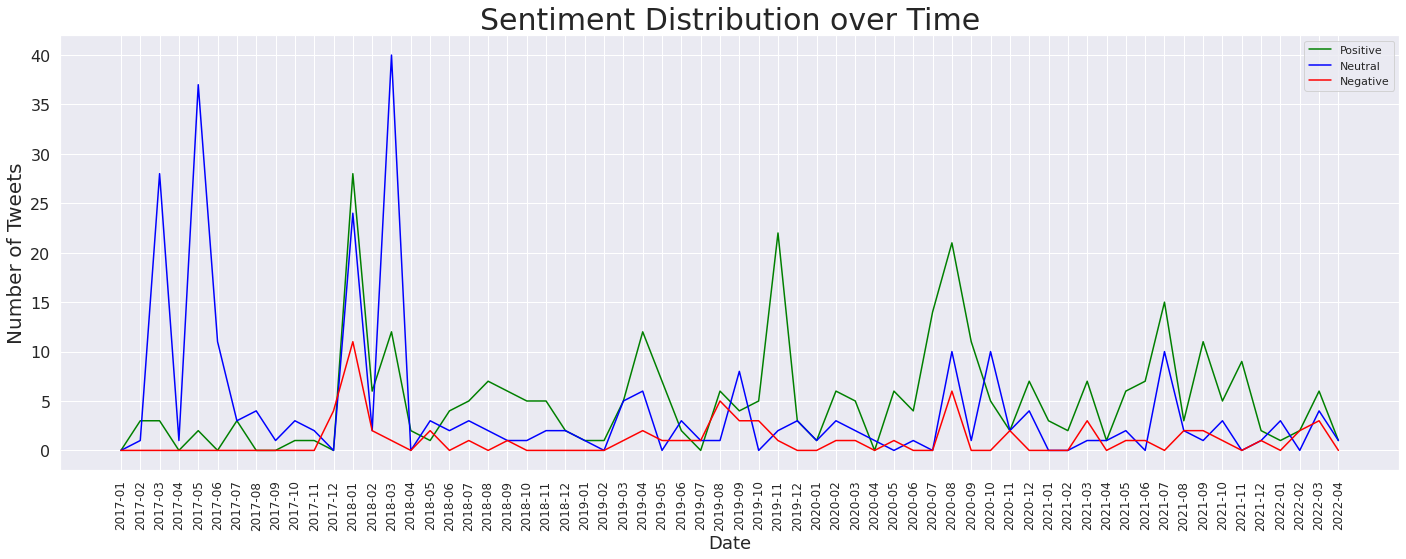

In [ ]:
# what is the sentiment of our college manually-identifyed cluster?
time_sentiment(('college', 'university', 'student', 'campus', 'tour', 'school'), 'year_month')
# it seems like there are several specific spikes which seem suspicious. They may not be correlated with popular sentiment, but rather articles.

In [ ]:
# get strongly positive Tweets
positive = tweets[tweets['C_Score'] > 0.5]

In [ ]:
pos_lemm_list = positive['lemmatized'].to_list()
flat_list = [item for sublist in pos_lemm_list for item in sublist]

In [ ]:
flat_list

['southern',
 'new',
 'england',
 'community',
 'action',
 'conference',
 'coming',
 'may',
 'special',
 'conference',
 'room',
 'rate',
 'graduate',
 'hotel',
 'providence',
 'rhode',
 'island',
 'end',
 'friday',
 'april',
 'miss',
 'learn',
 'book',
 'room',
 'today',
 'recently',
 'completed',
 'shh',
 'new',
 'graduate',
 'hotel',
 'oxford',
 'firmly',
 'embeds',
 'location',
 'theatrical',
 'alice',
 'reastaurant',
 'bar',
 'executive',
 'chef',
 'chris',
 'emery',
 'take',
 'design',
 'inspiration',
 'oxford',
 'university',
 'alumnus',
 'lewis',
 'carroll',
 'awesome',
 'day',
 'meeting',
 'new',
 'friend',
 'reviv',
 'room',
 'graduate',
 'hotel',
 'thanks',
 'connecting',
 'u',
 'sweet',
 'andrew',
 'darling',
 'family',
 'hope',
 'guy',
 'enjoy',
 'new',
 'lego',
 'set',
 'snd',
 'telescope',
 'great',
 'meeting',
 'saturday',
 'morning',
 'graduate',
 'hotel',
 'hope',
 'see',
 'vega',
 'soon',
 'steve',
 'craig',
 'cliff',
 'go',
 'cat',
 'milk',
 'honey',
 'brunch',
 'spo

In [ ]:
# what are the most common words here? 
# do they give insights as to any clustering?
most_common = pd.DataFrame.from_dict(Counter(flat_list), orient='index').reset_index().sort_values([0], ascending=False)
most_common

,index,0
12,hotel,1346
11,graduate,1323
1,new,133
180,inspired,133
207,stay,132
...,...,...
2250,lorin,1
2251,cartwright,1
2252,outfitting,1
2253,ascott,1


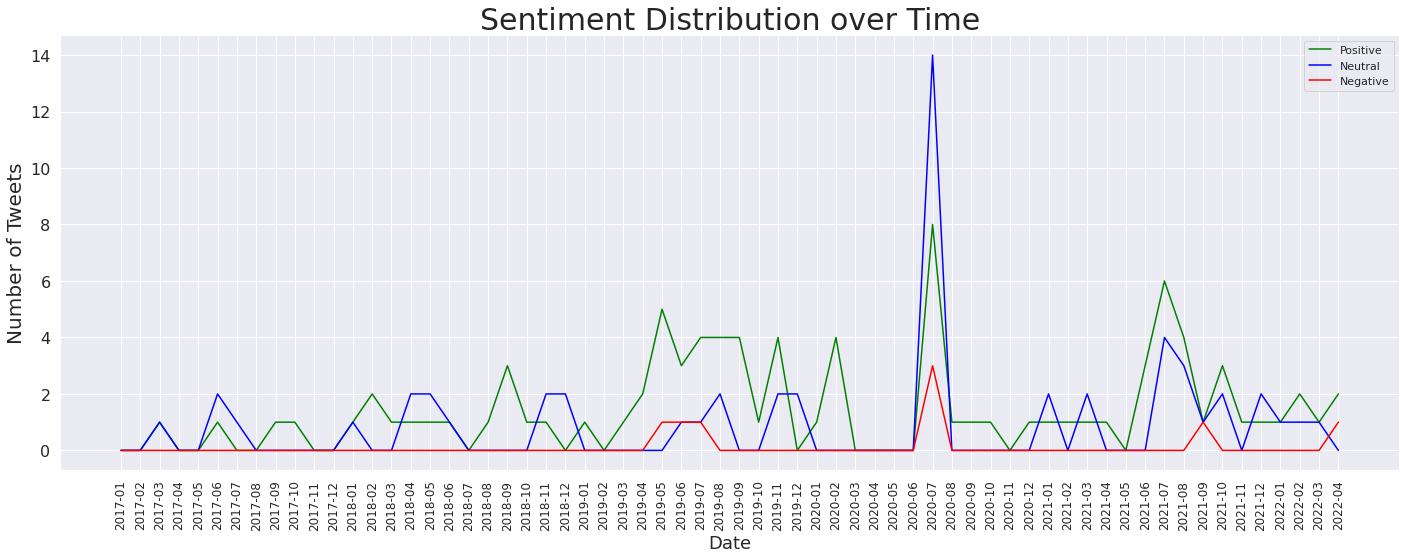

In [ ]:
time_sentiment(('view', 'rooftop',), 'year_month')

In [ ]:
# let's look at the strongly negative Tweets
neg = tweets[tweets['C_Score'] < -0.5]

In [ ]:
neg_lemm_list = neg['lemmatized'].to_list()
neg_flat_list = [item for sublist in neg_lemm_list for item in sublist]

In [ ]:
display(Counter(neg_flat_list).most_common(100))

[('hotel', 173),
 ('graduate', 154),
 ('annapolis', 34),
 ('police', 28),
 ('mother', 20),
 ('killed', 19),
 ('get', 18),
 ('naval', 17),
 ('academy', 17),
 ('midshipman', 17),
 ('sitting', 15),
 ('outside', 14),
 ('one', 13),
 ('bullet', 13),
 ('stray', 13),
 ('u', 12),
 ('patio', 12),
 ('shot', 12),
 ('room', 11),
 ('west', 11),
 ('man', 11),
 ('michelle', 11),
 ('cummings', 11),
 ('street', 10),
 ('never', 10),
 ('suspect', 10),
 ('go', 10),
 ('standoff', 10),
 ('say', 9),
 ('tuesday', 8),
 ('day', 8),
 ('fatally', 8),
 ('today', 8),
 ('son', 7),
 ('time', 7),
 ('make', 7),
 ('life', 7),
 ('people', 7),
 ('death', 7),
 ('state', 7),
 ('fuck', 7),
 ('two', 7),
 ('black', 7),
 ('thing', 7),
 ('year', 7),
 ('morning', 7),
 ('early', 7),
 ('eye', 7),
 ('area', 7),
 ('dumb', 7),
 ('end', 6),
 ('college', 6),
 ('via', 6),
 ('new', 6),
 ('place', 6),
 ('bad', 6),
 ('violence', 6),
 ('stay', 6),
 ('see', 6),
 ('charge', 6),
 ('crisis', 6),
 ('open', 6),
 ('dumber', 6),
 ('devil', 5),
 ('goi

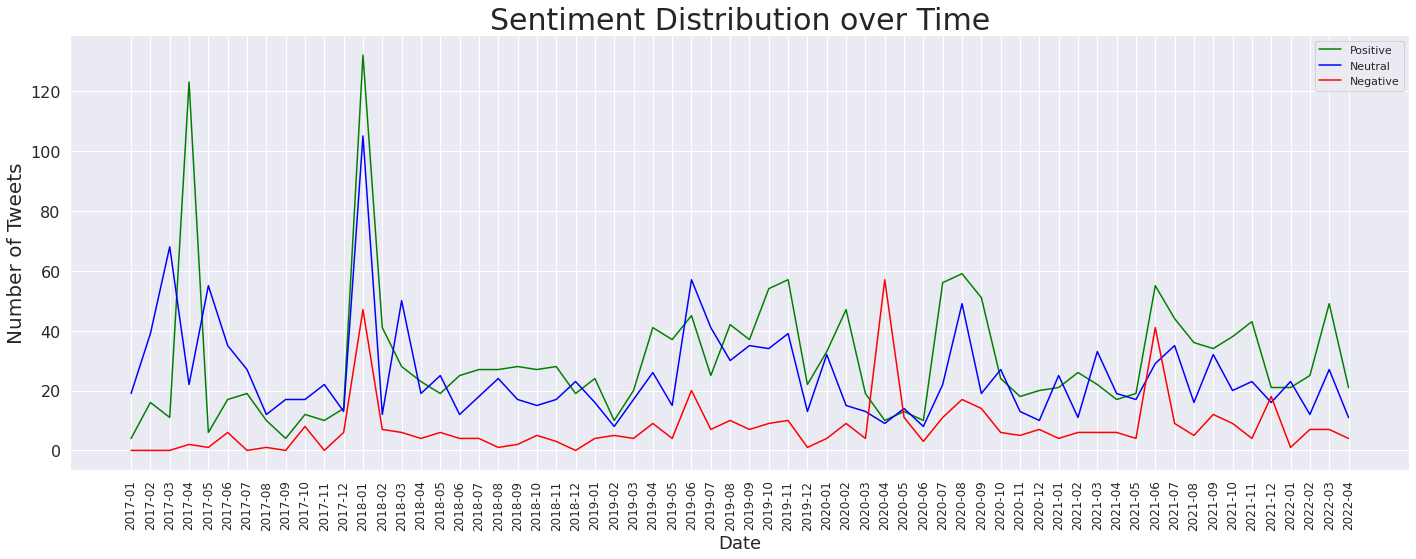

In [ ]:
# this gets the distribution over all words (because all tweets contain "graduate hotel")
time_sentiment(('graduate','hotel',), 'year_month')

In [ ]:
tweets[tweets['year_month'] == '2020-04']

,id,content,date,stripped,C_Score,Sentiment,year,month,year_month,text,tokenized,lemmatized,lemm_set
1818,1255152390992302080,"Secret rooms: Some hotels and venues have secret rooms always ask about them as they usually make for great event spaces , VIP areas etc. \n\n( The Library Room at the McDonald Randolph/Graduate Hotel is awesome) \n\n#secrets #events #eventsmanagement #ven…https://t.co/KuLZNq8V4K",2020-04-28 15:10:24+00:00,"Secret rooms: Some hotels and venues have secret rooms always ask about them as they usually make for great event spaces , VIP areas etc. ( The Library Room at the McDonald Randolph/Graduate Hotel is awesome) secrets events eventsmanagement ven…",0.9222,Positive,2020,4,2020-04,"Secret rooms: Some hotels and venues have secret rooms always ask about them as they usually make for great event spaces , VIP areas etc. ( The Library Room at the McDonald Randolph/Graduate Hotel is awesome) …","[secret, rooms, hotels, venues, secret, rooms, always, ask, usually, make, great, event, spaces, vip, areas, etc, library, room, mcdonald, hotel, awesome]","[secret, room, hotel, venue, secret, room, always, ask, usually, make, great, event, space, vip, area, etc, library, room, mcdonald, hotel, awesome]","{vip, event, secret, mcdonald, great, always, hotel, etc, library, make, awesome, ask, room, space, venue, area, usually}"
1819,1254893082056683520,Berkeley’s Graduate Hotel ended its contract with the bakery due to a coronavirus-related drop in revenue https://t.co/O2wuurEAew,2020-04-27 22:00:00+00:00,Berkeley’s Graduate Hotel ended its contract with the bakery due to a coronavirus-related drop in revenue,-0.2732,Negative,2020,4,2020-04,Berkeley’s Graduate Hotel ended its contract with the bakery due to a coronavirusrelated drop in revenue,"[berkeley, graduate, hotel, ended, contract, bakery, due, coronavirusrelated, drop, revenue]","[berkeley, graduate, hotel, ended, contract, bakery, due, coronavirusrelated, drop, revenue]","{berkeley, bakery, due, revenue, ended, contract, hotel, drop, graduate, coronavirusrelated}"
1820,1254368285212266496,"#DoNotDisturb sign, the Graduate Hotel chain. #FontSunday @DesignMuseum https://t.co/IlS8ZCKCYw",2020-04-26 11:14:38+00:00,"DoNotDisturb sign, the Graduate Hotel chain. FontSunday DesignMuseum",0.0000,Neutral,2020,4,2020-04,"sign, the Graduate Hotel chain.","[sign, graduate, hotel, chain]","[sign, graduate, hotel, chain]","{sign, chain, hotel, graduate}"
1821,1253848451844055045,Sad news to report: Tartine Berkeley has been permanently closed. We received a letter from Tartine’s attorneys that the Graduate Hotel where Tartine Berkeley occupies has ended their contract with Tartine sighting ‘business decline’ and ‘COVID-19’. \nhttps://t.co/2rivYKhtSD,2020-04-25 00:49:00+00:00,Sad news to report: Tartine Berkeley has been permanently closed. We received a letter from Tartine’s attorneys that the Graduate Hotel where Tartine Berkeley occupies has ended their contract with Tartine sighting ‘business decline’ and ‘COVID-19’.,-0.4767,Negative,2020,4,2020-04,Sad news to report: Tartine Berkeley has been permanently closed. We received a letter from Tartine’s attorneys that the Graduate Hotel where Tartine Berkeley occupies has ended their contract with Tartine sighting ‘business decline’ and ‘COVID19’.,"[sad, news, report, tartine, berkeley, permanently, closed, received, letter, tartine, attorneys, graduate, hotel, tartine, berkeley, occupies, ended, contract, tartine, sighting, business, decline]","[sad, news, report, tartine, berkeley, permanently, closed, received, letter, tartine, attorney, graduate, hotel, tartine, berkeley, occupies, ended, contract, tartine, sighting, business, decline]","{decline, berkeley, attorney, sad, ended, contract, hotel, graduate, tartine, sighting, news, received, letter, closed, business, permanently, report, occupies}"
1822,1253756043059884032,@OmeedTavasoli the union instagram just posted that the graduate hotel has ended their contract :(((((

## What have we found?
The negative reviews don't have much to do with COVID - in fact, they represent a mistake of Vader in misreading an article title. And it looks like a lot of those are the same article. This indicates how the graduate hotel tweets may not be representative of popular sentiment, but rather the current social media narrative, frequently driven by relevant articles.

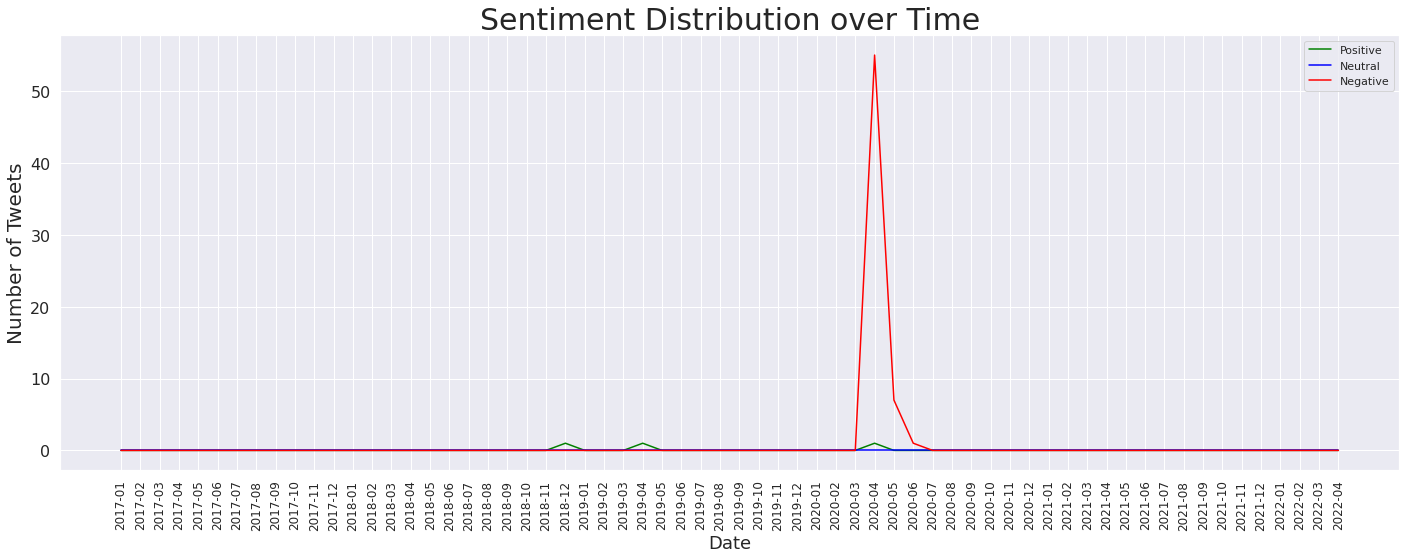

In [ ]:
time_sentiment(('beating', 'competitor'), 'year_month')

In [ ]:
pd.set_option('max_colwidth', 300)

In [ ]:
# define a function that gets the graph and the relevant Tweets
def tweet_get(words):
  print('Relevant Tweets for: ' + str(words) + "\n\n")
  time_sentiment(words, 'year_month')
  return tweets[tweets['lemm_set'].apply(lambda x: any(map((lambda value: value in x), words)))][['date', 'content']]

Relevant Tweets for: ('berkeley',)




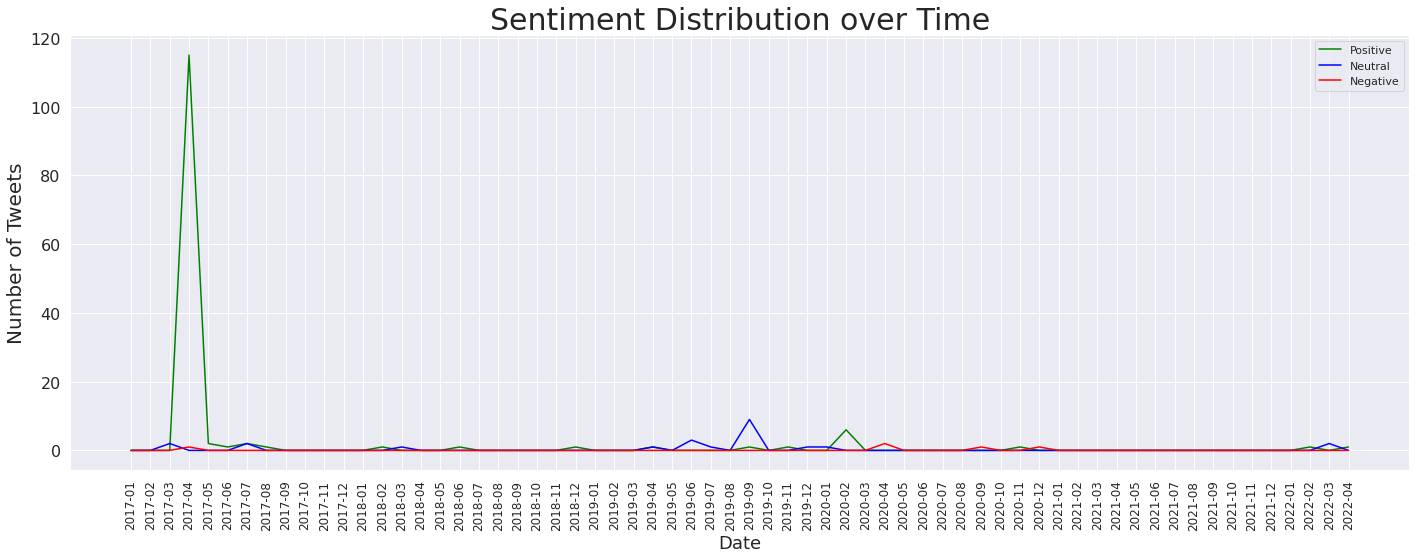

,date,content
11,2022-04-10 14:54:22+00:00,"The ASA Pacific Division is pleased to announce the Call for Papers for its 2023 meeting at the Graduate Hotel, Berkeley, CA, March 10-11, 2023.\n\nSUBMISSION DEADLINE: November 30, 2022.\nThe meeting will focus on ""Applied Aesthetics.""\n\nhttps://t.co/ReEyBSWH2r"
38,2022-03-31 03:35:34+00:00,@ashmosley @nitashatiku Downtown Berkeley has a brand new hotel and a “graduate” hotel near the UC campus too.
60,2022-03-21 16:55:03+00:00,2023 ASA Pacific Meeting\n\nPlease hold your calendar for the 2023 ASA Pacific Meeting March 10-11 at the Graduate Hotel in Berkeley.\n\nhttps://t.co/eqF6XCWx77
161,2022-02-03 00:24:11+00:00,"#opportunity @ SBE Restaurant Group (Berkeley, CA) - Line Cook - C3 by SBE &amp; Graduate Hotels® https://t.co/2aYqxyf5QJ #Job #JobSeekers #Jobs #Berkeley"
1017,2020-12-20 20:28:20+00:00,"The @Graduate_Hotels in Evanston IL (we've stayed at the Graduate in Berkeley) has a ""Home Alone"" room (""Book now, ya filthy animal."") https://t.co/8cyz6agt7R"
1089,2020-11-12 18:06:05+00:00,Berkeley CA USA - Maintenance Helper - Description Graduate Hotels is seeking a Maintenance Helper t: Description Graduate Hotels is seeking a Maintenance Helper to join Graduate Berkeley and its wonderful team of hospital https://t.co/NguUjbNJGR
1214,2020-09-30 17:15:40+00:00,"@chrisdaleoxford Stayed in the Graduate Hotel in Berkeley, California, last year. Not great. This isn’t good news."
1819,2020-04-27 22:00:00+00:00,Berkeley’s Graduate Hotel ended its contract with the bakery due to a coronavirus-related drop in revenue https://t.co/O2wuurEAew
1821,2020-04-25 00:49:00+00:00,Sad news to report: Tartine Berkeley has been permanently closed. We received a letter from Tartine’s attorneys that the Graduate Hotel where Tartine Berkeley occupies has ended their contract with Tartine sighting ‘business decline’ and ‘COVID-19’. \nhttps://t.co/2rivYKhtSD
1936,2020-02-28 01:55:04+00:00,"Feeling left out because you're not at the NaNo-Novel Premiere Party at the Graduate Hotel in Berkeley, CA right now? Join in the fun virtually with this live stream! https://t.co/6bZq7wsp3w #nanowrimo #nanonowwhat https://t.co/CoXJXNp52p"


In [ ]:
# we see that the berkeley spike has to do with an article in 2017
tweet_get(('berkeley',))

Relevant Tweets for: ('beating', 'competitor')




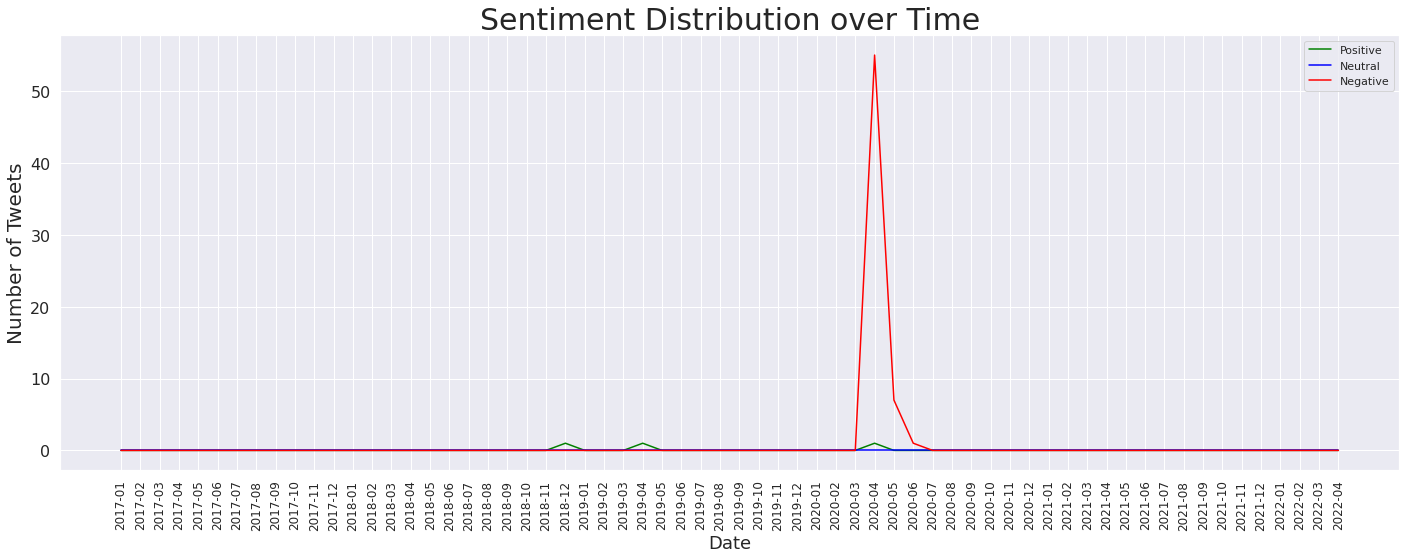

,date,content
1756,2020-06-29 19:00:01+00:00,"Graduate Hotels Is Beating Its Competitors By Going Hyper, Hyper Local https://t.co/HyI54dVwtw"
1799,2020-05-10 07:56:27+00:00,"Entrepreneur: Graduate Hotels Is Beating Its Competitors By Going Hyper, Hyper Local https://t.co/MuwB2mTJjX"
1800,2020-05-10 07:42:13+00:00,"Entrepreneur: Graduate Hotels Is Beating Its Competitors By Going Hyper, Hyper Local https://t.co/AoAGro9KZc #entrepreneur #smallbiz #ersloanguy"
1801,2020-05-10 07:39:06+00:00,"Entrepreneur: Graduate Hotels Is Beating Its Competitors By Going Hyper, Hyper Local https://t.co/NtYEXifKbt"
1802,2020-05-10 07:29:24+00:00,"Entrepreneur: Graduate Hotels Is Beating Its Competitors By Going Hyper, Hyper Local https://t.co/Ut7fsWKtU1"
1803,2020-05-10 07:28:22+00:00,"#RT @Entrepreneur: Graduate Hotels Is Beating Its Competitors By Going Hyper, Hyper Local https://t.co/Fo1MpABC94"
1804,2020-05-09 17:05:04+00:00,"Graduate Hotels Is Beating Its Competitors By Going Hyper, Hyper Local https://t.co/65eIRdstkR"
1815,2020-05-04 01:31:03+00:00,"Graduate Hotels Is Beating Its Competitors By Going Hyper, Hyper Local https://t.co/7eIyXTYXU6 https://t.co/fjiyFlVxJt"
1825,2020-04-18 21:12:24+00:00,"Graduate Hotels Is Beating Its Competitors By Going Hyper, Hyper Local via @Entrepreneur https://t.co/cxu58cqI5C"
1826,2020-04-18 19:07:33+00:00,"Graduate Hotels Is Beating Its Competitors By Going Hyper, Hyper Local https://t.co/Xt1C5hMbFj https://t.co/X86IlvxQPD"


In [ ]:
# these tweets are responsible for the covid spike, which turns out Graduate Hotels was just beating its competitors by going local
# the negative sentiment makes sense in terms of the words used, although it is inaccurate. It was beneficial in identifying the spike
tweet_get(('beating','competitor',))

Relevant Tweets for: ('annapolis',)




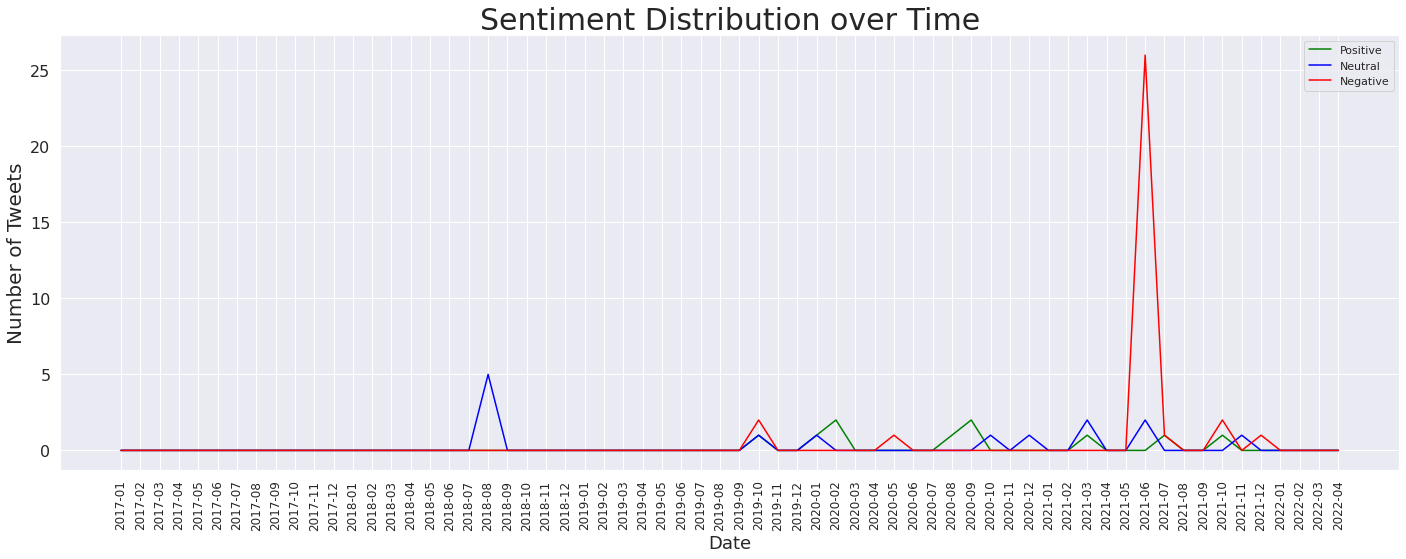

,date,content
224,2021-12-22 05:15:29+00:00,"@ECUAthletics \n\nAD Jon Gilbert referenced a reception at the The Graduate Hotel in Annapolis on the 26th, but there was no time mentioned. What time does it start ?"
311,2021-11-11 03:54:22+00:00,@DavidtheAdmiral this picture was taken in the lobby of the Graduate Hotel in Annapolis. https://t.co/YFqXCm3t9j
357,2021-10-24 16:01:32+00:00,Thank you to the Graduate Hotel in Annapolis for being a sponsor for our production of Romeo and Juliet! https://t.co/Ce6x4v116W
377,2021-10-14 19:20:12+00:00,"Annapolis Police investigate the scene of a shooting at the end of Pleasant Street, behind the Graduate Hotel. \n\nThis is the same area a stray bullet came from that killed Michelle Cummings, 57, while dropping off her son at USNA in June.\n\nMore pix at https://t.co/jpzUrIJa46 https://t.co/d9n..."
387,2021-10-11 12:16:22+00:00,"New Pod! @schofkid &amp; @BWagner_CapGaz break down Navy's loss to SMU. This pod is brought to you by our sponsors: The Graduate Hotel, Sheehy Lexus of Annapolis, The Naval Academy Athletic Association, Dry 85 &amp; Montana 3000. @CSSProvision @wardcarroll \nhttps://t.co/qK0ASfnOoq"
589,2021-07-14 17:09:40+00:00,"Annapolis Police have arrested as a suspect in the June 29 killing of Michelle Cummings, a Naval Academy mother struck by a bullet outside the Graduate Hotel on West Street. Chief Ed Jackson about to make the announcement at a news conference. https://t.co/mCg2JEeb8P"
605,2021-07-08 14:06:37+00:00,"Graduate Annapolis, MD | Our 30-day Tour of the Graduate Hotels from Pro... https://t.co/GhWPQDdw4l via @YouTube Between the history, beauty, and fun, this amazing Graduate Hotel makes an impression to remember."
639,2021-06-30 23:45:00+00:00,"The murder of a midshipman candidate's mother comes as gun violence soars across the country.\n\nMichelle Cummings, was killed by two stray bullets while sitting outside the Graduate Hotel in Annapolis early Tuesday morning.\n\nhttps://t.co/Vdrj9TIrGW"
641,2021-06-30 21:03:44+00:00,"FBI, ATF offer $20,000 reward in shooting outside Annapolis Graduate Hotel that killed Naval Academy mom https://t.co/ZxI9C8jDuF https://t.co/kDhy6UAmNB"
642,2021-06-30 20:12:33+00:00,"#FBI, #ATF offer $20,000 reward in #shooting outside Annapolis Graduate Hotel that #killed - Jun 30 @ 4:10 PM ET https://t.co/mqYDqugIz6"


In [ ]:
# the annapolis tweets are a bad look for graduate hotels about a shooting that occurred at Graduate Hotels Annapolis
# that is the spike there
tweet_get(('annapolis',))

Relevant Tweets for: ('safety',)




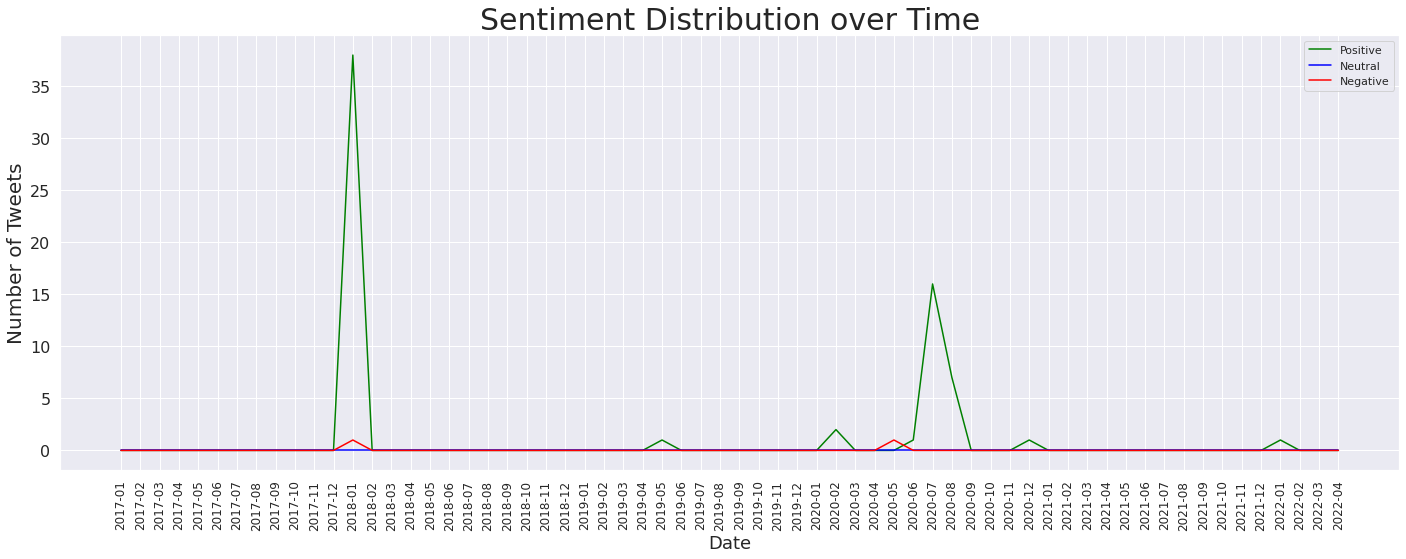

,date,content
180,2022-01-21 20:00:01+00:00,Our biggest event of the year is back! Join us for the Nebraska Safety Council Conference &amp; Tradeshow on April 21 at the Graduate Hotel in Lincoln. Learn more and register now!\n\nhttps://t.co/oF0TGHrzSo
1035,2020-12-08 19:46:15+00:00,"Our top priority is the health and safety of our guests and associates. As we have reopened our doors, Graduate Cares – our COVID-19 response program –has put the well-being of all our visitors and associates at the forefront of the Graduate Hotels.\n\nhttps://t.co/RP62zAVcu7 https://t.co/jnZY3V..."
1367,2020-08-23 03:00:05+00:00,"@UMNpublicsafety @wwozzydo ""08/13/2020 - 14:57\nU of M Twin Cities: Police have a barricaded suspect at The Graduate Hotel, 615 Washington Ave Se, stay away from the area. Updates and safety tips at https://t.co/kcwH4zABV7""\nthis sounds familiar...."
1370,2020-08-21 15:30:39+00:00,"Hotel chains like Wyndham, Hilton and Graduate Hotels are working with universities to house students during the #coronavirus pandemic. Will it help improve their safety? https://t.co/4cenp4D0VM"
1409,2020-08-14 01:37:20+00:00,08/13/2020 - 20:28\nU of M Twin Cities: The situation at the Graduate Hotel is under control and has been concluded. It is safe to return to the area. updates and safety tips at https://t.co/UBWEOAmXAK https://t.co/nDv11INTcO
1410,2020-08-14 01:34:20+00:00,🚨: UPDATE\n\nALL CLEAR - The public safety issue at The Graduate Hotel near the University Recreation and Wellness Center is under control and has been concluded. It is now safe to be in the area. Thank you for your patience and cooperation. https://t.co/RmVVox75FH
1431,2020-08-13 20:45:32+00:00,"#BREAKING: Police have a barricaded suspect at The Graduate Hotel, per a short campus safety alert. Stay tuned for updates. \n\nBy @JasmineSnow15 \nhttps://t.co/bXrEOMiEz7"
1432,2020-08-13 20:42:39+00:00,"Alert! Police have a barricaded suspect at The Graduate Hotel, across the street from the Parking &amp; Transportation Services office in the Transportation &amp; Safety Building. Please stay away from the area. Find updates and safety tips at https://t.co/ZQOlg4y44v."
1438,2020-08-13 20:12:56+00:00,"UMPD Safety Alert just sent out: Police have a barricaded suspect at The Graduate Hotel, 615 Washington Ave Se, stay away from the area."
1554,2020-07-26 13:09:04+00:00,"ByChristopher ElliottSenior ContributorJul 25, 2020School’s Back In Session: How Graduate Hotels Is Prioritizing Safety ... https://t.co/6v6YlyTZxd #pubs"


In [ ]:
# this tweet set is actually about a UMN public safety alert near the hotel - a lot of emergency tweets issued
tweet_get(('safety',))

## Conclusions
What can we tell from this? 
- The narrative around Graduate Hotels' Twitter page focuses heavily on these "spikes" of content, where a particular article gets heavily popularized and contributes to the sentiment domination.
- There seems to be relatively less involved activity on the part of individual users in getting any coordinated public opinion or brand campaign.
- There needs to be some addressing of safety since that seems to be a common concern near college campuses - this is important for branding and this is a risk, since you do not want the hotels to be negatively associated as unsafe.
- You want more interaction with the public posting images of the "rooftop view" and similar attributes that they enjoy - more public involvement and contribution.